# Imports

I'm setting matplotlib to draw nice js widgets, and setting my system to look at the 'procgen-tools' lib that I'm editing, rather than the system version.

In [2]:
%matplotlib widget

In [3]:
# this allows editing of imported modules without restarting kernel
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.insert(0,"/home/trist/progging/MIRL/procgen-tools")

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
from pixcluscol import InteractivePixCol

In [52]:
from scipy.cluster import hierarchy
from scipy.cluster import vq

In [9]:
from namespacer import NameSpacer  # WARNING: must have "NameSpacer" identifier.
NameSpacer("ns")

NameSpacer("ns")

# Layers

In [11]:
dirname = "activations_2024-07-30T01:05:48.898678"

In [10]:
#========================================================================================================
#==----- List of Activations, -------- Layer Names, ---- and ------ File Names. -----====================
#========================================================================================================
#   torch.Size([1, 64, 64, 64]) <-- block1.conv              - block1.conv._1af_4096dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.maxpool           - block1.maxpool._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.relu1        - block1.res1.relu1._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.conv1        - block1.res1.conv1._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.relu2        - block1.res1.relu2._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.conv2        - block1.res1.conv2._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.resadd       - block1.res1.resadd._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res2.relu1        - block1.res2.relu1._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res2.conv1        - block1.res2.conv1._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res2.relu2        - block1.res2.relu2._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res2.conv2        - block1.res2.conv2._1af_1024dp_64dim_.bin
#   torch.Size([1, 64, 32, 32]) <-- block1.res2.resadd       - block1.res2.resadd._1af_1024dp_64dim_.bin
#  torch.Size([1, 128, 32, 32]) <-- block2.conv              - block2.conv._1af_1024dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.maxpool           - block2.maxpool._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res1.relu1        - block2.res1.relu1._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res1.conv1        - block2.res1.conv1._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res1.relu2        - block2.res1.relu2._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res1.conv2        - block2.res1.conv2._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res1.resadd       - block2.res1.resadd._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res2.relu1        - block2.res2.relu1._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res2.conv1        - block2.res2.conv1._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res2.relu2        - block2.res2.relu2._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res2.conv2        - block2.res2.conv2._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block2.res2.resadd       - block2.res2.resadd._1af_256dp_128dim_.bin
#  torch.Size([1, 128, 16, 16]) <-- block3.conv              - block3.conv._1af_256dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.maxpool           - block3.maxpool._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res1.relu1        - block3.res1.relu1._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res1.conv1        - block3.res1.conv1._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res1.relu2        - block3.res1.relu2._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res1.conv2        - block3.res1.conv2._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res1.resadd       - block3.res1.resadd._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res2.relu1        - block3.res2.relu1._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res2.conv1        - block3.res2.conv1._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res2.relu2        - block3.res2.relu2._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res2.conv2        - block3.res2.conv2._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- block3.res2.resadd       - block3.res2.resadd._1af_64dp_128dim_.bin
#    torch.Size([1, 128, 8, 8]) <-- relu3                    - relu3._1af_64dp_128dim_.bin
#         torch.Size([1, 8192]) <-- flatten                  - flatten._1af_1dp_8192dim_.bin
#          torch.Size([1, 256]) <-- fc                       - fc._1af_1dp_256dim_.bin
#          torch.Size([1, 256]) <-- relufc                   - relufc._1af_1dp_256dim_.bin


## block1.conv

In [177]:
#############################
                       ######
ns.set("block1.conv")     ####
                       ######
#############################
#   torch.Size([1, 64, 64, 64]) <-- block1.conv              - block1.conv._1af_4096dp_64dim_.bin


In [109]:
ns(
filename = "block1.conv._1af_4096dp_64dim_.bin",
num_channels = 64,
pix_dim = 64,
)

ns(activ_img = (np.fromfile(dirname+"/"+filename, dtype=np.float32)
            .reshape((pix_dim, pix_dim, num_channels, ))
            .transpose((2,0,1))
            ))
activ_img.shape

(64, 64, 64)

In [110]:
ns(
activ_img = (np.fromfile(dirname+"/block1.conv._1af_4096dp_64dim_.bin", dtype=np.float32)
            .reshape((64,64,64))
            .transpose((2,0,1))
            ))
activ_img.shape

(64, 64, 64)

### Clustering

#### Hierarchal Linking

In [111]:
ns(pixels = activ_img.reshape((64,-1)))

In [112]:
ns(pix_link = hierarchy.linkage(
    pixels.transpose([1,0]),
    metric='euclidean',
    method='single',
    ))

In [113]:
#link_tree = hierarchy.to_tree(pix_link)

#### Dendrogram

(-0.02, 0.6)

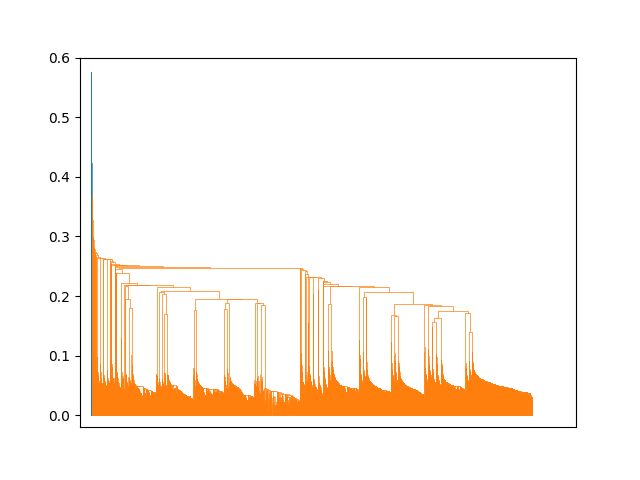

In [114]:
_fig_ax = plt.subplots()
ns( fig = _fig_ax[0], ax = _fig_ax[1] )
acf = ax.add_collection
# dendrogram doesn't have linewidth setting
# but it can be bodged on by hacking the axes
def linmodacf(colec):
    colec.set(linewidth=0.5,)
    acf(colec)
ax.add_collection = linmodacf

ddg=hierarchy.dendrogram(pix_link,
           count_sort='ascending',
           no_labels=True,
           ax=ax,
           )

ax.set_xlim([-1000,45000])
ax.set_ylim([-0.02,0.6])

#### Classify by Hierarchy

In [115]:
ns(classif = hierarchy.fcluster(
    pix_link,
    0.14,
    criterion='distance',
    depth=2,
    ))
classif.min(), classif.max()

(1, 99)

#### Classify by K-Means

In [116]:
num_classes = 15
_kmean_ = vq.kmeans2(pixels.T, num_classes, minit='points')
ns(km_centroids = _kmean_[0],
   km_label = _kmean_[1] +1 ## plus 1 back from zero indexing
  )
km_label.min(), km_label.max()

(1, 15)

### Interactive Pixel Cluster Labeling

In [123]:
# Create a new Interactive Pixel Colorer giving it the pixel classes shaped back into an image (64x64 in this case)
ns(pixCol = InteractivePixCol(  classif.reshape((64,64))  ))

In [178]:
# Previous classifications can be printed out and loaded from text.
# This is somewhat strange, but allows for easily going back and forth
# between this tool and NDSP.

pixCol.loadClassif(
    [[[186, 76, 254], [181, 76, 254], [186, 76, 254], [181, 76, 253], [167, 75, 251], [172, 75, 253], [176, 75, 251], [171, 75, 250], [183, 75, 250], [247, 82, 74], [238, 83, 71], [138, 71, 237], [241, 80, 72], [243, 81, 73], [176, 75, 253], [197, 75, 252], [185, 75, 253], [247, 74, 151], [186, 76, 254], [188, 75, 251], [255, 80, 76], [254, 76, 185], [208, 137, 62], [244, 85, 73], [253, 76, 175], [58, 180, 54], [64, 216, 148], [75, 119, 250], [67, 110, 224], [193, 75, 253], [254, 76, 139], [196, 75, 251], [181, 74, 248], [81, 44, 147], [254, 80, 76], [159, 73, 245], [250, 83, 75], [120, 47, 157], [175, 71, 239], [131, 56, 187], [156, 62, 208], [125, 42, 140], [182, 219, 65], [253, 84, 75], [110, 72, 33], [98, 253, 75], [172, 72, 241], [243, 236, 73], [251, 191, 75], [250, 202, 75], [251, 220, 75], [163, 68, 229], [73, 219, 244], [249, 76, 254], [75, 186, 252], [253, 237, 75], [72, 119, 242], [251, 203, 75], [66, 141, 221], [69, 99, 233], [253, 196, 75], [253, 205, 76], [244, 185, 73], [244, 193, 73], [251, 186, 75], [76, 149, 254], [69, 216, 231], [66, 181, 221], [66, 198, 220], [74, 137, 247], [73, 191, 244], [69, 145, 233], [69, 179, 233]], ["edge n wall ww", "edge w wall n", "edge n wall e", "edge n wall w", "edge w wall sss", "edge w wall ss", "edge n wall ee", "edge s wall w", "edge s wall ee", "oc nw", "ic se", "edge s wall e", "ic swe", "ic nwse", "edge w wall nn", "edge s wall ww", "edge e wall s", "oc swe", "edge w wall s", "edge e wall ?s", "oc se", "ic nese", "inner wall", "ic nw", "ic ne", "wall s", "wall e", "mouse nnww", "mouse ssww", "edge e wall n", "oc nes", "edge e wall ss", "edge s wall eee", "edge w", "ic nes", "edge e wall nn", "oc ne", "edge s", "edge sw", "edge n", "edge ne", "edge e", "wall w", "oc sw", "floor", "wall n", "edge se", "cheese ww", "cheese nee", "cheese see", "cheese ee", "edge nw", "mouse nee", "edge n wall ?", "mouse nne", "cheese nww", "mouse nww", "cheese e", "mouse ssw", "mouse sww", "cheese ne", "cheese nw", "cheese sw", "cheese w", "cheese se", "mouse nnw", "mouse see", "mouse sse", "mouse ssee", "mouse nw", "mouse ne", "mouse sw", "mouse se"], [51, 39, 39, 39, 39, 39, 39, 0, 3, 2, 6, 39, 39, 39, 39, 39, 39, 0, 3, 53, 2, 6, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 0, 3, 2, 6, 39, 39, 39, 39, 39, 39, 0, 3, 2, 6, 39, 40, 33, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 44, 45, 45, 45, 45, 10, 22, 26, 12, 45, 45, 45, 36, 44, 44, 42, 22, 22, 26, 12, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 36, 44, 44, 42, 22, 26, 44, 44, 44, 45, 45, 45, 45, 10, 22, 26, 44, 44, 41, 33, 44, 42, 9, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 22, 26, 44, 44, 42, 9, 22, 22, 22, 22, 22, 26, 44, 44, 41, 33, 44, 42, 22, 23, 25, 25, 24, 22, 23, 25, 25, 25, 25, 20, 44, 44, 43, 17, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 20, 44, 44, 43, 17, 20, 44, 44, 43, 17, 25, 25, 25, 25, 25, 20, 44, 44, 41, 33, 44, 42, 22, 26, 13, 44, 34, 21, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 55, 61, 60, 48, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 47, 63, 57, 50, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 44, 45, 36, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 36, 44, 44, 45, 45, 36, 44, 44, 45, 45, 36, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 62, 64, 49, 44, 44, 45, 36, 44, 44, 44, 45, 36, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 9, 30, 44, 44, 42, 9, 22, 22, 22, 22, 22, 22, 30, 44, 42, 9, 22, 30, 44, 42, 9, 22, 30, 44, 42, 9, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 9, 30, 44, 44, 42, 9, 30, 44, 44, 41, 33, 44, 43, 17, 20, 44, 44, 43, 17, 20, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 23, 25, 25, 25, 25, 20, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 43, 17, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 26, 13, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 14, 45, 45, 45, 36, 44, 44, 44, 45, 45, 45, 45, 10, 22, 26, 12, 45, 10, 22, 22, 26, 12, 45, 45, 45, 45, 45, 10, 22, 22, 26, 12, 10, 22, 22, 26, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 10, 22, 26, 12, 45, 10, 22, 26, 44, 44, 42, 22, 26, 12, 45, 35, 1, 22, 22, 22, 30, 44, 44, 42, 9, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 9, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 29, 5, 25, 24, 22, 26, 44, 44, 42, 22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 22, 22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 20, 44, 42, 22, 22, 23, 25, 24, 22, 22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 20, 44, 44, 43, 17, 25, 25, 25, 16, 4, 44, 34, 21, 26, 44, 44, 42, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 13, 34, 21, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 31, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 33, 44, 42, 22, 26, 12, 45, 10, 22, 26, 12, 45, 45, 45, 45, 45, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 44, 44, 45, 45, 36, 44, 44, 45, 45, 45, 45, 10, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 45, 36, 44, 44, 44, 45, 36, 44, 44, 44, 45, 36, 44, 44, 41, 33, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 26, 44, 42, 9, 22, 30, 44, 42, 9, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 9, 30, 44, 44, 42, 9, 30, 44, 44, 42, 9, 30, 44, 44, 41, 33, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 23, 25, 25, 25, 25, 25, 25, 25, 24, 22, 23, 25, 25, 25, 25, 25, 20, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 43, 17, 25, 25, 25, 24, 22, 22, 26, 44, 43, 17, 25, 20, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 13, 44, 44, 44, 44, 44, 44, 34, 21, 26, 13, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 44, 45, 45, 45, 45, 10, 22, 26, 12, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 12, 10, 22, 22, 26, 12, 45, 45, 45, 36, 44, 42, 22, 22, 26, 12, 45, 45, 45, 45, 45, 45, 10, 22, 26, 12, 45, 10, 22, 26, 12, 45, 10, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 9, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 44, 41, 33, 44, 43, 17, 20, 44, 44, 43, 17, 25, 25, 25, 24, 22, 23, 25, 25, 25, 25, 25, 20, 44, 43, 17, 25, 25, 25, 25, 25, 25, 25, 25, 24, 22, 22, 26, 44, 42, 22, 22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 22, 26, 44, 44, 41, 33, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 44, 42, 22, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 26, 44, 44, 41, 14, 45, 45, 45, 45, 45, 45, 45, 45, 36, 44, 44, 42, 22, 26, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 36, 44, 44, 45, 45, 36, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 45, 45, 36, 44, 44, 44, 45, 45, 45, 45, 45, 45, 36, 44, 44, 42, 22, 26, 12, 45, 35, 1, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 22, 26, 44, 44, 42, 9, 22, 22, 22, 22, 22, 22, 30, 44, 42, 9, 22, 30, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 9, 22, 30, 44, 44, 42, 9, 22, 22, 22, 22, 22, 30, 44, 44, 42, 22, 22, 22, 22, 29, 18, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 19, 5, 25, 25, 25, 25, 25, 25, 24, 22, 26, 44, 44, 43, 17, 20, 44, 44, 43, 17, 25, 25, 25, 24, 22, 22, 26, 44, 42, 22, 22, 26, 44, 43, 17, 25, 20, 44, 43, 17, 25, 20, 44, 42, 22, 22, 26, 44, 44, 42, 22, 23, 25, 25, 25, 25, 20, 44, 44, 43, 17, 25, 25, 25, 16, 4, 44, 44, 44, 44, 44, 44, 34, 21, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 42, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 31, 14, 45, 45, 45, 36, 44, 44, 42, 22, 26, 12, 45, 45, 45, 45, 45, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 12, 10, 22, 22, 26, 44, 44, 45, 45, 45, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 44, 44, 42, 22, 26, 12, 45, 45, 45, 36, 44, 44, 44, 45, 45, 45, 45, 35, 1, 22, 22, 22, 30, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 9, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 9, 22, 22, 22, 29, 18, 22, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 19, 5, 25, 25, 25, 20, 44, 44, 43, 17, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 20, 44, 42, 22, 22, 23, 25, 25, 25, 25, 20, 44, 42, 22, 22, 23, 25, 24, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 22, 23, 25, 25, 25, 25, 20, 44, 44, 42, 22, 23, 25, 25, 16, 4, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 13, 44, 44, 44, 44, 44, 42, 22, 22, 26, 13, 34, 21, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 22, 26, 13, 44, 44, 44, 44, 44, 44, 42, 22, 26, 13, 44, 31, 14, 45, 45, 45, 36, 44, 44, 44, 45, 36, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 12, 45, 45, 45, 36, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 12, 10, 22, 22, 26, 12, 45, 10, 22, 26, 44, 44, 44, 45, 36, 44, 44, 42, 22, 26, 44, 44, 41, 1, 22, 22, 22, 30, 44, 44, 42, 9, 30, 44, 44, 42, 9, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 9, 30, 44, 44, 42, 22, 26, 44, 44, 41, 18, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 5, 25, 24, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 23, 25, 25, 24, 22, 22, 26, 44, 42, 22, 22, 23, 25, 24, 22, 22, 26, 44, 42, 22, 22, 26, 44, 43, 17, 25, 25, 25, 24, 22, 22, 23, 25, 25, 24, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 4, 44, 34, 21, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 13, 44, 34, 21, 22, 26, 44, 42, 22, 22, 26, 13, 34, 21, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 13, 44, 34, 21, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 12, 45, 10, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 26, 12, 10, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 12, 45, 45, 45, 36, 44, 42, 22, 22, 26, 44, 44, 42, 22, 26, 12, 45, 10, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 23, 25, 25, 24, 22, 26, 44, 44, 43, 17, 20, 44, 44, 42, 22, 22, 23, 25, 24, 22, 22, 26, 44, 42, 22, 22, 26, 44, 43, 17, 25, 25, 25, 25, 25, 25, 20, 44, 42, 22, 22, 26, 44, 44, 43, 17, 25, 25, 25, 24, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 13, 44, 34, 21, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 13, 34, 21, 22, 26, 44, 42, 22, 22, 27, 65, 54, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 34, 21, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 56, 69, 70, 52, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 12, 45, 45, 45, 36, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 59, 71, 72, 66, 45, 45, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 12, 45, 45, 45, 36, 44, 44, 42, 22, 26, 12, 45, 10, 22, 26, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 42, 22, 22, 28, 58, 67, 68, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 22, 22, 22, 22, 22, 22, 26, 44, 44, 41, 33, 44, 43, 17, 20, 44, 44, 43, 17, 25, 25, 25, 24, 22, 26, 44, 44, 42, 22, 22, 26, 44, 43, 17, 25, 20, 44, 43, 17, 25, 20, 44, 42, 22, 22, 23, 25, 25, 25, 25, 20, 44, 43, 17, 25, 25, 25, 25, 25, 25, 20, 44, 44, 42, 22, 23, 25, 25, 25, 25, 20, 44, 44, 41, 33, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 26, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 13, 44, 44, 44, 44, 44, 44, 41, 33, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 41, 33, 44, 44, 45, 36, 44, 44, 44, 45, 45, 45, 45, 10, 22, 26, 44, 44, 42, 22, 22, 26, 12, 45, 45, 45, 45, 45, 45, 45, 45, 36, 44, 42, 22, 22, 26, 12, 45, 45, 45, 45, 45, 45, 45, 45, 36, 44, 44, 44, 45, 36, 44, 44, 42, 22, 26, 12, 45, 45, 45, 36, 44, 44, 41, 33, 44, 42, 9, 30, 44, 44, 42, 9, 22, 22, 22, 22, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 9, 30, 44, 44, 42, 22, 22, 22, 22, 22, 22, 30, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 23, 25, 25, 25, 25, 20, 44, 44, 43, 17, 25, 25, 25, 24, 22, 22, 23, 25, 25, 25, 25, 20, 44, 43, 17, 25, 25, 25, 24, 22, 22, 23, 25, 25, 25, 25, 20, 44, 44, 42, 22, 26, 44, 44, 43, 17, 25, 25, 25, 25, 25, 20, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 34, 21, 22, 26, 13, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 33, 44, 42, 22, 26, 44, 44, 42, 22, 26, 12, 45, 45, 45, 36, 44, 44, 44, 45, 45, 36, 44, 42, 22, 22, 26, 12, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 10, 22, 22, 26, 44, 44, 45, 45, 45, 45, 45, 10, 22, 26, 12, 45, 45, 45, 36, 44, 44, 44, 45, 45, 45, 45, 35, 33, 44, 42, 22, 26, 44, 44, 42, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 9, 22, 30, 44, 42, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 26, 44, 42, 9, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 44, 44, 42, 9, 22, 22, 22, 29, 33, 44, 42, 22, 26, 44, 44, 43, 17, 25, 25, 25, 25, 25, 20, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 20, 44, 42, 22, 22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 20, 44, 44, 43, 17, 25, 25, 25, 16, 33, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 13, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 31, 33, 44, 42, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 22, 22, 26, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 41, 38, 37, 15, 7, 8, 32, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 15, 7, 11, 8, 32, 15, 7, 11, 8, 32, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 15, 7, 11, 8, 32, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 46]]

)

In [119]:
#pixCol.printClassif()

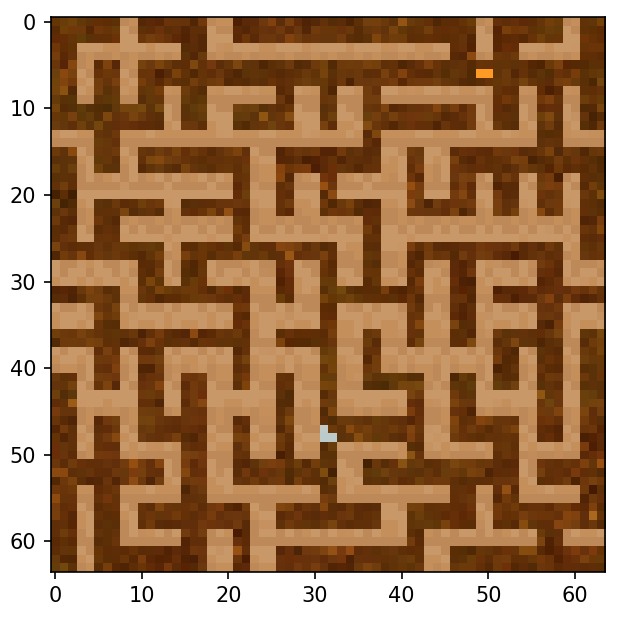

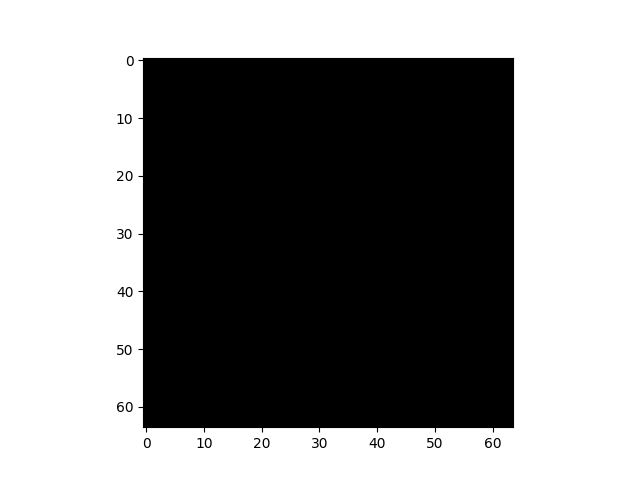

In [124]:
pixCol.drawPlot()

### Analysis

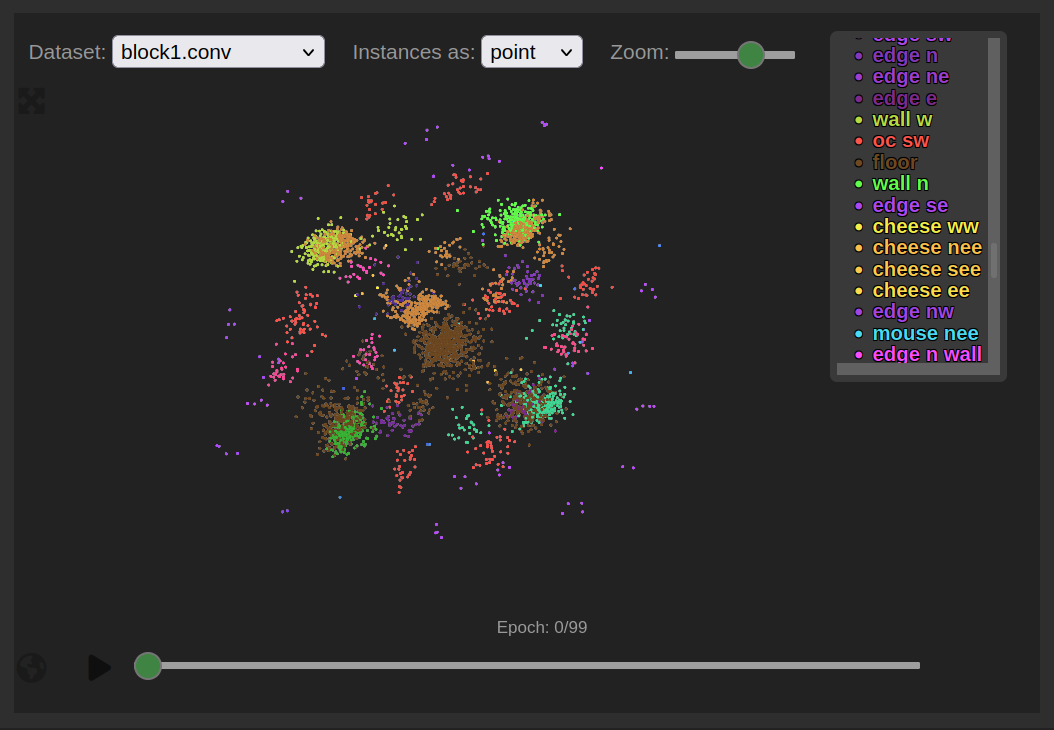

This was from the old classif. New classif has 99 classes.

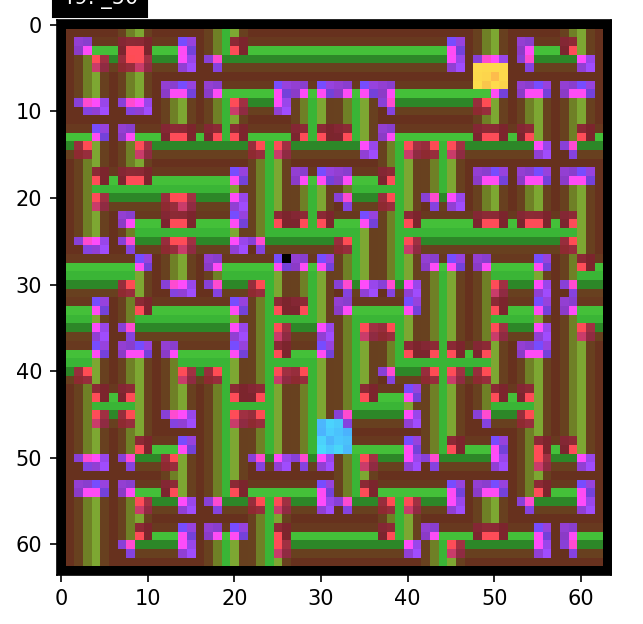

New classif!

In [ ]:
ns

## block1.maxpool

## block1.res1.relu1

## block1.res1.conv1

In [179]:
##############################################
                                        ######
                                             #
ns.set("block1.res1.conv1")
                                             #
                                        ######
##############################################
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.conv1        - block1.res1.conv1._1af_1024dp_64dim_.bin


In [157]:
ns(
filename = "block1.res1.conv1._1af_1024dp_64dim_.bin",
num_channels = 64,
pix_dim = 32,
)

ns(
activ_img = (np.fromfile(dirname+"/"+filename, dtype=np.float32)
            .reshape((pix_dim, pix_dim, num_channels))
            .transpose((2,0,1))
            )
)
activ_img.shape

(64, 32, 32)

### Clustering

#### Hierarchal Linking

In [164]:
ns(pixels = activ_img.reshape((num_channels,-1)))
pixels.shape

(64, 1024)

In [159]:
ns(pix_link = hierarchy.linkage(
    pixels.transpose([1,0]),
    metric='euclidean',
    method='single',
    ))

In [160]:
#link_tree = hierarchy.to_tree(pix_link)

#### Dendrogram

/tmp/ipykernel_17056/2607238790.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _fig_ax = plt.subplots()


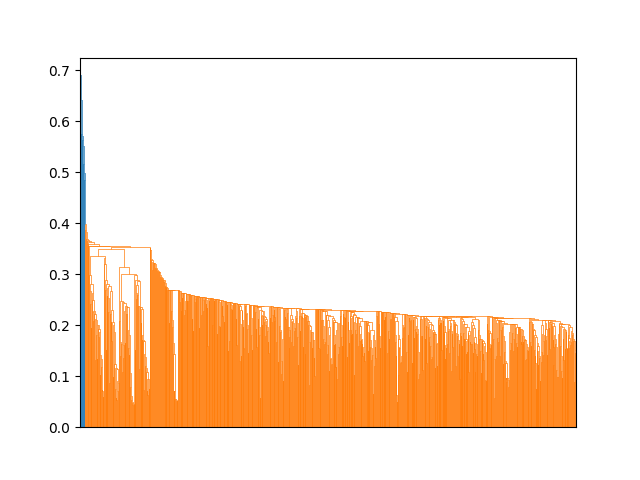

In [161]:
_fig_ax = plt.subplots()
ns(
dendro_fig = _fig_ax[0],
dendro_ax = _fig_ax[1],
)

acf = dendro_ax.add_collection
# dendrogram doesn't have linewidth setting
# but it can be bodged on by hacking the axes
def linmodacf(colec):
    colec.set(linewidth=0.5,)
    acf(colec)
dendro_ax.add_collection = linmodacf

ddg=hierarchy.dendrogram(pix_link,
           count_sort='ascending',
           no_labels=True,
           ax=dendro_ax,
           )

In [162]:
dendro_ax.set_xlim([-1000,12000])
dendro_ax.set_ylim([-0.02,0.8])

(-0.02, 0.8)

#### Classify by Hierarchy

In [163]:
ns(hi_classif = hierarchy.fcluster(
    pix_link,
    0.23,
    criterion='distance',
    depth=2,
    ))

hi_classif.min(), hi_classif.max()

(1, 272)

#### Classify by K-Means

In [197]:
num_classes = 100
_kmean_ = vq.kmeans2(pixels.T, num_classes, minit='points')
ns(km_centroids = _kmean_[0],
   km_classif = _kmean_[1] +1 ## plus 1 back from zero indexing
  )
km_classif.min(), km_classif.max()

(1, 100)

### Interactive Pixel Cluster Labeling

In [198]:
# Create a new Interactive Pixel Colorer giving it the pixel classes shaped back into an image (64x64 in this case)

#ns(pixCol = InteractivePixCol(  hi_classif.reshape((pix_dim,pix_dim))  ))
ns(pixCol = InteractivePixCol(  km_classif.reshape((pix_dim,pix_dim))  ))

In [203]:
# load classif
pixCol.loadClassif(
    # - co, ci -- corner outer, corner inner
    # - tl, tr, bl, br -- top left, top right, bottom left, bottom right
    # 
    # - bright pink -- co tl
    # - bright purple -- co tr
    # - dark pink -- co bl
    # - dark purple -- co br
    # - 
    # - 
#    [[[76, 229, 254], [0, 0, 0], [0, 0, 0], [98, 134, 40], [0, 0, 0], [56, 188, 132], [71, 47, 157], [254, 247, 76], [0, 0, 0], [95, 133, 40], [76, 242, 255], [181, 63, 54], [111, 134, 40], [152, 204, 61], [0, 0, 0], [181, 63, 54], [0, 0, 0], [0, 0, 0], [60, 202, 142], [181, 57, 54], [62, 209, 133], [0, 0, 0], [0, 0, 0], [147, 205, 61], [254, 117, 76], [0, 0, 0], [181, 63, 54], [114, 54, 180], [253, 75, 246], [40, 134, 94], [150, 205, 61], [147, 75, 253], [147, 205, 61], [0, 0, 0], [0, 0, 0], [97, 133, 40], [219, 76, 254], [0, 0, 0], [181, 111, 54], [158, 206, 62], [0, 0, 0], [180, 62, 54], [73, 47, 157], [0, 0, 0], [46, 155, 114], [130, 178, 53], [137, 206, 62], [45, 151, 119], [180, 107, 54], [0, 0, 0], [40, 134, 101], [0, 0, 0], [61, 206, 168], [181, 111, 54], [143, 75, 253], [76, 237, 254], [179, 53, 109], [62, 207, 149], [41, 138, 102], [45, 152, 102], [62, 208, 139], [0, 0, 0], [150, 209, 62], [41, 139, 102], [124, 169, 50], [155, 221, 66], [96, 131, 39], [61, 204, 144], [0, 0, 0], [0, 0, 0], [66, 208, 62], [0, 0, 0], [98, 134, 40], [254, 76, 238], [0, 0, 0], [254, 76, 234], [143, 75, 251], [253, 76, 221], [92, 134, 40], [0, 0, 0], [78, 47, 157], [100, 137, 41], [40, 136, 86], [153, 205, 61], [0, 0, 0], [46, 155, 119], [181, 57, 54], [0, 0, 0], [253, 76, 238], [254, 88, 76], [62, 206, 149], [0, 0, 0], [41, 137, 103], [0, 0, 0], [182, 105, 54], [61, 205, 138], [76, 228, 253], [130, 191, 57], [253, 155, 76], [173, 76, 254]], ["_1", "_2", "_3", "_4", "_5", "_6", "_7", "_8", "_9", "_10", "_11", "_12", "_13", "_14", "_15", "_16", "_17", "_18", "_19", "_20", "_21", "_22", "_23", "_24", "_25", "_26", "_27", "_28", "_29", "_30", "_31", "_32", "_33", "_34", "_35", "_36", "_37", "_38", "_39", "_40", "_41", "_42", "_43", "_44", "_45", "_46", "_47", "_48", "_49", "_50", "_51", "_52", "_53", "_54", "_55", "_56", "_57", "_58", "_59", "_60", "_61", "_62", "_63", "_64", "_65", "_66", "_67", "_68", "_69", "_70", "_71", "_72", "_73", "_74", "_75", "_76", "_77", "_78", "_79", "_80", "_81", "_82", "_83", "_84", "_85", "_86", "_87", "_88", "_89", "_90", "_91", "_92", "_93", "_94", "_95", "_96", "_97", "_98", "_99", "_100"], [69, 69, 69, 51, 2, 2, 69, 69, 51, 2, 2, 2, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 51, 2, 2, 69, 69, 51, 2, 22, 37, 43, 43, 70, 89, 68, 43, 93, 90, 21, 68, 39, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 93, 60, 6, 88, 43, 93, 70, 68, 22, 37, 91, 92, 72, 48, 53, 78, 42, 90, 34, 12, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 42, 60, 6, 56, 16, 3, 9, 33, 22, 37, 91, 29, 94, 59, 38, 36, 46, 79, 46, 46, 65, 46, 36, 75, 36, 36, 75, 36, 75, 65, 65, 65, 7, 7, 23, 79, 75, 31, 36, 75, 22, 37, 91, 6, 67, 34, 44, 77, 76, 88, 77, 45, 14, 54, 90, 28, 76, 77, 28, 76, 45, 45, 66, 66, 7, 7, 76, 79, 28, 76, 77, 28, 22, 37, 27, 80, 27, 27, 42, 60, 85, 49, 5, 38, 64, 64, 49, 89, 85, 18, 47, 47, 64, 64, 64, 64, 26, 11, 85, 49, 5, 58, 60, 68, 87, 37, 62, 39, 88, 62, 62, 70, 98, 24, 63, 98, 32, 32, 70, 63, 98, 24, 63, 98, 62, 39, 39, 39, 62, 70, 98, 24, 63, 44, 60, 25, 87, 37, 72, 58, 88, 5, 53, 9, 12, 12, 9, 26, 41, 92, 53, 9, 12, 9, 6, 90, 28, 53, 41, 74, 53, 9, 12, 3, 9, 42, 60, 34, 61, 37, 11, 50, 49, 5, 38, 65, 65, 65, 65, 46, 19, 59, 38, 75, 36, 36, 46, 83, 89, 44, 94, 59, 38, 36, 75, 36, 75, 46, 46, 75, 61, 37, 91, 21, 24, 63, 30, 30, 14, 14, 14, 54, 20, 82, 73, 77, 76, 88, 45, 70, 63, 44, 52, 59, 44, 77, 76, 88, 28, 76, 77, 28, 22, 37, 91, 82, 53, 9, 26, 41, 74, 74, 74, 42, 20, 82, 67, 5, 85, 3, 72, 72, 15, 44, 60, 34, 42, 60, 85, 49, 5, 58, 60, 68, 22, 37, 91, 82, 73, 75, 46, 11, 13, 13, 13, 99, 57, 82, 24, 63, 98, 23, 99, 11, 86, 98, 23, 23, 83, 70, 98, 24, 63, 98, 18, 68, 22, 37, 91, 6, 56, 45, 3, 72, 1, 35, 81, 42, 57, 34, 12, 9, 12, 35, 29, 20, 52, 12, 35, 35, 3, 9, 12, 12, 9, 12, 41, 33, 22, 37, 46, 83, 83, 23, 31, 19, 94, 36, 75, 80, 83, 99, 36, 75, 31, 19, 50, 67, 52, 44, 36, 75, 31, 36, 65, 65, 65, 31, 19, 33, 87, 37, 45, 30, 30, 13, 54, 60, 29, 73, 45, 45, 30, 13, 73, 28, 76, 57, 29, 67, 5, 6, 73, 28, 76, 77, 45, 14, 14, 54, 11, 25, 61, 91, 72, 78, 41, 15, 58, 60, 6, 56, 3, 72, 41, 29, 67, 5, 85, 60, 6, 56, 81, 6, 57, 68, 58, 60, 92, 74, 74, 42, 60, 81, 61, 91, 97, 99, 11, 86, 98, 23, 83, 83, 23, 99, 19, 50, 24, 63, 44, 46, 23, 83, 23, 99, 20, 68, 44, 60, 21, 23, 99, 54, 46, 23, 61, 91, 97, 42, 56, 34, 12, 3, 3, 3, 81, 42, 57, 1, 12, 81, 6, 57, 92, 92, 35, 58, 20, 5, 44, 60, 1, 35, 81, 42, 60, 92, 61, 91, 97, 80, 79, 75, 31, 36, 75, 65, 65, 80, 20, 5, 38, 65, 80, 20, 47, 94, 86, 58, 18, 5, 98, 18, 82, 36, 75, 31, 60, 34, 61, 91, 97, 54, 79, 28, 76, 77, 45, 45, 13, 54, 20, 21, 30, 13, 54, 20, 82, 67, 52, 98, 30, 63, 30, 30, 82, 73, 28, 76, 60, 68, 22, 91, 72, 58, 49, 5, 58, 60, 92, 53, 15, 58, 18, 48, 41, 15, 58, 18, 82, 67, 81, 26, 41, 48, 53, 41, 85, 49, 5, 58, 18, 68, 22, 37, 11, 50, 24, 63, 44, 60, 82, 94, 86, 98, 18, 82, 94, 86, 44, 95, 82, 98, 23, 99, 19, 59, 94, 11, 50, 24, 63, 44, 18, 68, 22, 37, 91, 1, 35, 33, 44, 60, 6, 67, 52, 12, 41, 29, 67, 5, 85, 35, 48, 12, 3, 42, 57, 59, 44, 11, 12, 12, 33, 44, 18, 68, 22, 37, 91, 82, 94, 86, 58, 27, 80, 49, 95, 44, 94, 50, 67, 0, 0, 96, 96, 64, 64, 80, 20, 68, 44, 27, 26, 26, 86, 58, 60, 68, 22, 37, 91, 82, 67, 21, 98, 62, 54, 20, 95, 44, 52, 29, 67, 73, 10, 10, 97, 39, 32, 54, 20, 95, 98, 62, 70, 49, 21, 98, 70, 63, 22, 37, 91, 6, 67, 34, 12, 41, 58, 58, 95, 44, 18, 6, 67, 56, 10, 10, 10, 53, 78, 42, 20, 34, 12, 78, 42, 49, 1, 12, 9, 33, 22, 37, 46, 46, 79, 46, 46, 11, 50, 67, 95, 98, 23, 23, 83, 23, 56, 55, 1, 13, 65, 46, 83, 23, 31, 36, 46, 49, 21, 13, 65, 65, 22, 37, 91, 76, 88, 77, 45, 66, 66, 67, 95, 12, 30, 13, 14, 14, 54, 20, 21, 12, 13, 14, 14, 66, 54, 77, 76, 20, 21, 12, 13, 66, 22, 37, 91, 85, 49, 5, 38, 64, 80, 27, 64, 26, 19, 59, 38, 64, 80, 27, 26, 26, 86, 38, 64, 64, 42, 60, 47, 27, 64, 64, 64, 64, 87, 37, 91, 82, 67, 21, 98, 32, 93, 88, 62, 54, 20, 1, 39, 39, 39, 39, 70, 70, 63, 44, 36, 39, 62, 70, 63, 32, 39, 39, 46, 32, 87, 37, 91, 82, 67, 34, 8, 8, 42, 90, 92, 85, 57, 40, 53, 8, 8, 8, 8, 8, 8, 17, 90, 40, 53, 9, 8, 8, 8, 16, 16, 16, 61, 37, 4, 71, 71, 84, 84, 84, 4, 4, 71, 71, 71, 71, 71, 84, 84, 84, 84, 84, 84, 4, 4, 71, 71, 84, 84, 84, 84, 84, 84, 84, 84]]
    [[[76, 229, 254], [0, 0, 0], [0, 0, 0], [98, 134, 40], [0, 0, 0], [56, 188, 132], [71, 47, 157], [254, 247, 76], [0, 0, 0], [95, 133, 40], [76, 242, 255], [181, 63, 54], [111, 134, 40], [152, 204, 61], [31, 66, 103], [181, 63, 54], [0, 0, 0], [0, 0, 0], [60, 202, 142], [181, 57, 54], [62, 209, 133], [0, 0, 0], [0, 0, 0], [147, 205, 61], [254, 117, 76], [0, 0, 0], [181, 63, 54], [114, 54, 180], [253, 75, 246], [40, 134, 94], [150, 205, 61], [147, 75, 253], [147, 205, 61], [0, 0, 0], [0, 0, 0], [97, 133, 40], [219, 76, 254], [0, 0, 0], [181, 111, 54], [158, 206, 62], [0, 0, 0], [180, 62, 54], [73, 47, 157], [173, 236, 71], [46, 155, 114], [130, 178, 53], [137, 206, 62], [45, 151, 119], [103, 151, 45], [0, 0, 0], [40, 134, 101], [0, 0, 0], [61, 206, 168], [181, 111, 54], [143, 75, 253], [76, 237, 254], [179, 53, 109], [62, 207, 149], [41, 138, 102], [45, 152, 102], [62, 208, 139], [0, 0, 0], [150, 209, 62], [41, 139, 102], [124, 169, 50], [155, 221, 66], [96, 131, 39], [61, 204, 144], [46, 156, 115], [0, 0, 0], [66, 208, 62], [0, 0, 0], [98, 134, 40], [254, 76, 238], [0, 0, 0], [254, 76, 234], [143, 75, 251], [253, 76, 221], [92, 134, 40], [0, 0, 0], [78, 47, 157], [100, 137, 41], [40, 136, 86], [153, 205, 61], [0, 0, 0], [46, 155, 119], [181, 57, 54], [0, 0, 0], [253, 76, 238], [254, 88, 76], [62, 206, 149], [0, 0, 0], [41, 137, 103], [0, 0, 0], [182, 105, 54], [61, 205, 138], [76, 228, 253], [130, 191, 57], [253, 155, 76], [173, 76, 254]], ["_1", "_2", "_3", "_4", "_5", "_6", "_7", "_8", "_9", "_10", "_11", "_12", "_13", "_14", "_15", "_16", "_17", "_18", "_19", "_20", "_21", "_22", "_23", "_24", "_25", "_26", "_27", "_28", "_29", "_30", "_31", "_32", "_33", "_34", "_35", "_36", "_37", "_38", "_39", "_40", "_41", "_42", "_43", "_44", "_45", "_46", "_47", "_48", "_49", "_50", "_51", "_52", "_53", "_54", "_55", "_56", "_57", "_58", "_59", "_60", "_61", "_62", "_63", "_64", "_65", "_66", "_67", "_68", "_69", "_70", "_71", "_72", "_73", "_74", "_75", "_76", "_77", "_78", "_79", "_80", "_81", "_82", "_83", "_84", "_85", "_86", "_87", "_88", "_89", "_90", "_91", "_92", "_93", "_94", "_95", "_96", "_97", "_98", "_99", "_100"], [69, 69, 69, 51, 2, 2, 69, 69, 51, 2, 2, 2, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 51, 2, 2, 69, 69, 51, 2, 22, 37, 43, 43, 70, 89, 68, 43, 93, 90, 21, 68, 39, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 93, 60, 6, 88, 43, 93, 70, 68, 22, 37, 91, 92, 72, 48, 53, 78, 42, 90, 34, 12, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 42, 60, 6, 56, 16, 3, 9, 33, 22, 37, 91, 29, 94, 59, 38, 36, 46, 79, 46, 46, 65, 46, 36, 75, 36, 36, 75, 36, 75, 65, 65, 65, 7, 7, 23, 79, 75, 31, 36, 75, 22, 37, 91, 6, 67, 34, 44, 77, 76, 88, 77, 45, 14, 54, 90, 28, 76, 77, 28, 76, 45, 45, 66, 66, 7, 7, 76, 79, 28, 76, 77, 28, 22, 37, 27, 80, 27, 27, 42, 60, 85, 49, 5, 38, 64, 64, 49, 89, 85, 18, 47, 47, 64, 64, 64, 64, 26, 11, 85, 49, 5, 58, 60, 68, 87, 37, 62, 39, 88, 62, 62, 70, 98, 24, 63, 98, 32, 32, 70, 63, 98, 24, 63, 98, 62, 39, 39, 39, 62, 70, 98, 24, 63, 44, 60, 25, 87, 37, 72, 58, 88, 5, 53, 9, 12, 12, 9, 26, 41, 92, 53, 9, 12, 9, 6, 90, 28, 53, 41, 74, 53, 9, 12, 3, 9, 42, 60, 34, 61, 37, 11, 50, 49, 5, 38, 65, 65, 65, 65, 46, 19, 59, 38, 75, 36, 36, 46, 83, 89, 44, 94, 59, 38, 36, 75, 36, 75, 46, 46, 75, 61, 37, 91, 21, 24, 63, 30, 30, 14, 14, 14, 54, 20, 82, 73, 77, 76, 88, 45, 70, 63, 44, 52, 59, 44, 77, 76, 88, 28, 76, 77, 28, 22, 37, 91, 82, 53, 9, 26, 41, 74, 74, 74, 42, 20, 82, 67, 5, 85, 3, 72, 72, 15, 44, 60, 34, 42, 60, 85, 49, 5, 58, 60, 68, 22, 37, 91, 82, 73, 75, 46, 11, 13, 13, 13, 99, 57, 82, 24, 63, 98, 23, 99, 11, 86, 98, 23, 23, 83, 70, 98, 24, 63, 98, 18, 68, 22, 37, 91, 6, 56, 45, 3, 72, 1, 35, 81, 42, 57, 34, 12, 9, 12, 35, 29, 20, 52, 12, 35, 35, 3, 9, 12, 12, 9, 12, 41, 33, 22, 37, 46, 83, 83, 23, 31, 19, 94, 36, 75, 80, 83, 99, 36, 75, 31, 19, 50, 67, 52, 44, 36, 75, 31, 36, 65, 65, 65, 31, 19, 33, 87, 37, 45, 30, 30, 13, 54, 60, 29, 73, 45, 45, 30, 13, 73, 28, 76, 57, 29, 67, 5, 6, 73, 28, 76, 77, 45, 14, 14, 54, 11, 25, 61, 91, 72, 78, 41, 15, 58, 60, 6, 56, 3, 72, 41, 29, 67, 5, 85, 60, 6, 56, 81, 6, 57, 68, 58, 60, 92, 74, 74, 42, 60, 81, 61, 91, 97, 99, 11, 86, 98, 23, 83, 83, 23, 99, 19, 50, 24, 63, 44, 46, 23, 83, 23, 99, 20, 68, 44, 60, 21, 23, 99, 54, 46, 23, 61, 91, 97, 42, 56, 34, 12, 3, 3, 3, 81, 42, 57, 1, 12, 81, 6, 57, 92, 92, 35, 58, 20, 5, 44, 60, 1, 35, 81, 42, 60, 92, 61, 91, 97, 80, 79, 75, 31, 36, 75, 65, 65, 80, 20, 5, 38, 65, 80, 20, 47, 94, 86, 58, 18, 5, 98, 18, 82, 36, 75, 31, 60, 34, 61, 91, 97, 54, 79, 28, 76, 77, 45, 45, 13, 54, 20, 21, 30, 13, 54, 20, 82, 67, 52, 98, 30, 63, 30, 30, 82, 73, 28, 76, 60, 68, 22, 91, 72, 58, 49, 5, 58, 60, 92, 53, 15, 58, 18, 48, 41, 15, 58, 18, 82, 67, 81, 26, 41, 48, 53, 41, 85, 49, 5, 58, 18, 68, 22, 37, 11, 50, 24, 63, 44, 60, 82, 94, 86, 98, 18, 82, 94, 86, 44, 95, 82, 98, 23, 99, 19, 59, 94, 11, 50, 24, 63, 44, 18, 68, 22, 37, 91, 1, 35, 33, 44, 60, 6, 67, 52, 12, 41, 29, 67, 5, 85, 35, 48, 12, 3, 42, 57, 59, 44, 11, 12, 12, 33, 44, 18, 68, 22, 37, 91, 82, 94, 86, 58, 27, 80, 49, 95, 44, 94, 50, 67, 0, 0, 96, 96, 64, 64, 80, 20, 68, 44, 27, 26, 26, 86, 58, 60, 68, 22, 37, 91, 82, 67, 21, 98, 62, 54, 20, 95, 44, 52, 29, 67, 73, 10, 10, 97, 39, 32, 54, 20, 95, 98, 62, 70, 49, 21, 98, 70, 63, 22, 37, 91, 6, 67, 34, 12, 41, 58, 58, 95, 44, 18, 6, 67, 56, 10, 10, 10, 53, 78, 42, 20, 34, 12, 78, 42, 49, 1, 12, 9, 33, 22, 37, 46, 46, 79, 46, 46, 11, 50, 67, 95, 98, 23, 23, 83, 23, 56, 55, 1, 13, 65, 46, 83, 23, 31, 36, 46, 49, 21, 13, 65, 65, 22, 37, 91, 76, 88, 77, 45, 66, 66, 67, 95, 12, 30, 13, 14, 14, 54, 20, 21, 12, 13, 14, 14, 66, 54, 77, 76, 20, 21, 12, 13, 66, 22, 37, 91, 85, 49, 5, 38, 64, 80, 27, 64, 26, 19, 59, 38, 64, 80, 27, 26, 26, 86, 38, 64, 64, 42, 60, 47, 27, 64, 64, 64, 64, 87, 37, 91, 82, 67, 21, 98, 32, 93, 88, 62, 54, 20, 1, 39, 39, 39, 39, 70, 70, 63, 44, 36, 39, 62, 70, 63, 32, 39, 39, 46, 32, 87, 37, 91, 82, 67, 34, 8, 8, 42, 90, 92, 85, 57, 40, 53, 8, 8, 8, 8, 8, 8, 17, 90, 40, 53, 9, 8, 8, 8, 16, 16, 16, 61, 37, 4, 71, 71, 84, 84, 84, 4, 4, 71, 71, 71, 71, 71, 84, 84, 84, 84, 84, 84, 4, 4, 71, 71, 84, 84, 84, 84, 84, 84, 84, 84]]

)

In [202]:
#pixCol.printClassif()

[[[76, 229, 254], [0, 0, 0], [0, 0, 0], [98, 134, 40], [0, 0, 0], [56, 188, 132], [71, 47, 157], [254, 247, 76], [0, 0, 0], [95, 133, 40], [76, 242, 255], [181, 63, 54], [111, 134, 40], [152, 204, 61], [31, 66, 103], [181, 63, 54], [0, 0, 0], [0, 0, 0], [60, 202, 142], [181, 57, 54], [62, 209, 133], [0, 0, 0], [0, 0, 0], [147, 205, 61], [254, 117, 76], [0, 0, 0], [181, 63, 54], [114, 54, 180], [253, 75, 246], [40, 134, 94], [150, 205, 61], [147, 75, 253], [147, 205, 61], [0, 0, 0], [0, 0, 0], [97, 133, 40], [219, 76, 254], [0, 0, 0], [181, 111, 54], [158, 206, 62], [0, 0, 0], [180, 62, 54], [73, 47, 157], [173, 236, 71], [46, 155, 114], [130, 178, 53], [137, 206, 62], [45, 151, 119], [103, 151, 45], [0, 0, 0], [40, 134, 101], [0, 0, 0], [61, 206, 168], [181, 111, 54], [143, 75, 253], [76, 237, 254], [179, 53, 109], [62, 207, 149], [41, 138, 102], [45, 152, 102], [62, 208, 139], [0, 0, 0], [150, 209, 62], [41, 139, 102], [124, 169, 50], [155, 221, 66], [96, 131, 39], [61, 204, 144], [46

In [184]:
#ns.namespaces["block1.conv"]["pixCol"].color_img.shape

(64, 64, 3)

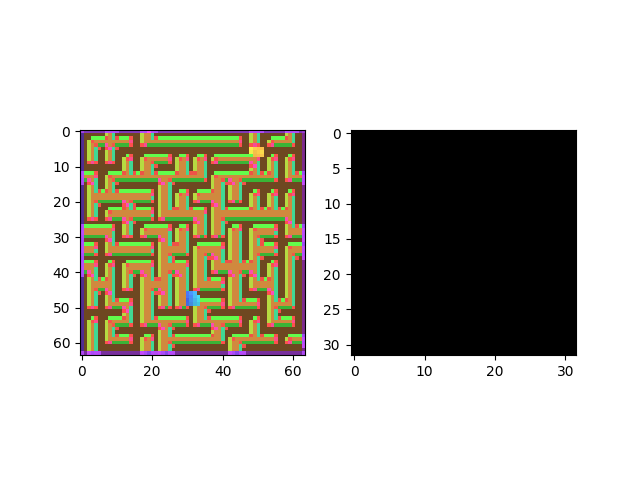

In [199]:
pixCol.drawPlot(ns.namespaces["block1.conv"]["pixCol"].color_img)

### Analysis

In [136]:
#############################
                       ###########
ns.set("block1.res1.relu1")     ####
                       ##########
#############################
#   torch.Size([1, 64, 32, 32]) <-- block1.res1.relu1        - block1.res1.relu1._1af_1024dp_64dim_.bin


In [137]:
ns(
filename = "block1.res1.relu1._1af_1024dp_64dim_.bin",
num_channels = 64,
pix_dim = 32,
)

ns(
activ_img = (np.fromfile(dirname+"/"+filename, dtype=np.float32)
            .reshape((pix_dim, pix_dim, num_channels))
            .transpose((2,0,1))
            )
)
activ_img.shape

(64, 32, 32)

### Clustering

#### Hierarchal Linking

In [146]:
ns(pixels = activ_img.reshape((num_channels,-1)))
pixels.shape

(64, 1024)

In [139]:
ns(pix_link = hierarchy.linkage(
    pixels.transpose([1,0]),
    metric='euclidean',
    method='single',
    ))

In [140]:
#link_tree = hierarchy.to_tree(pix_link)

#### Dendrogram

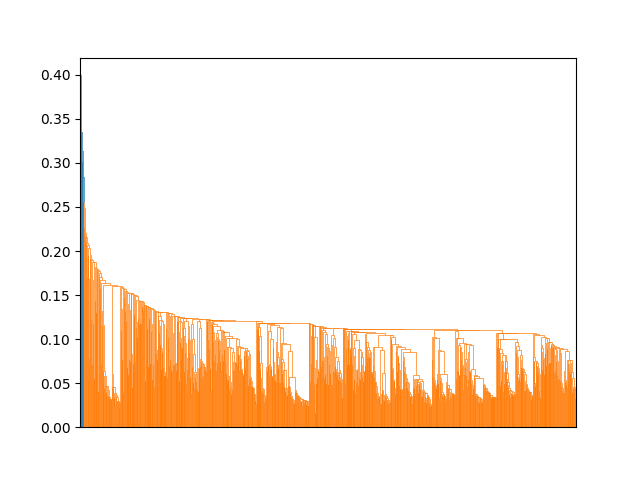

In [141]:
_fig_ax = plt.subplots()
ns(
dendro_fig = _fig_ax[0],
dendro_ax = _fig_ax[1],
)

acf = dendro_ax.add_collection
# dendrogram doesn't have linewidth setting
# but it can be bodged on by hacking the axes
def linmodacf(colec):
    colec.set(linewidth=0.5,)
    acf(colec)
dendro_ax.add_collection = linmodacf

ddg=hierarchy.dendrogram(pix_link,
           count_sort='ascending',
           no_labels=True,
           ax=dendro_ax,
           )

In [143]:
dendro_ax.set_xlim([-1000,12000])
dendro_ax.set_ylim([-0.02,0.5])

(-0.02, 0.5)

#### Classify by Hierarchy

In [145]:
ns(hi_classif = hierarchy.fcluster(
    pix_link,
    0.10,
    criterion='distance',
    depth=2,
    ))

hi_classif.min(), hi_classif.max()

(1, 241)

#### Classify by K-Means

In [147]:
num_classes = 100
_kmean_ = vq.kmeans2(pixels.T, num_classes, minit='points')
ns(km_centroids = _kmean_[0],
   km_classif = _kmean_[1] +1 ## plus 1 back from zero indexing
  )
km_classif.min(), km_classif.max()

(1, 100)

### Interactive Pixel Cluster Labeling

In [148]:
# Create a new Interactive Pixel Colorer giving it the pixel classes shaped back into an image (64x64 in this case)

#ns(pixCol = InteractivePixCol(  hi_classif.reshape((pix_dim,pix_dim))  ))
ns(pixCol = InteractivePixCol(  km_classif.reshape((pix_dim,pix_dim))  ))

In [154]:
# load classif
pixCol.loadClassif(
    # clustered with k means to 100 clusters
    [[[176, 52, 142], [0, 0, 0], [59, 197, 145], [32, 31, 105], [50, 169, 108], [181, 66, 54], [152, 76, 254], [142, 182, 54], [253, 159, 76], [32, 35, 107], [32, 33, 107], [167, 50, 77], [145, 198, 59], [0, 0, 0], [52, 174, 122], [0, 0, 0], [0, 0, 0], [104, 53, 178], [0, 0, 0], [0, 0, 0], [32, 32, 107], [54, 181, 142], [57, 191, 137], [0, 0, 0], [0, 0, 0], [39, 34, 116], [0, 0, 0], [54, 181, 110], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [32, 32, 107], [170, 51, 129], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [108, 158, 47], [0, 0, 0], [0, 0, 0], [0, 0, 0], [144, 184, 55], [0, 0, 0], [37, 31, 104], [205, 145, 61], [0, 0, 0], [107, 157, 47], [0, 0, 0], [0, 0, 0], [0, 0, 0], [182, 123, 54], [0, 0, 0], [46, 155, 106], [0, 0, 0], [251, 75, 240], [0, 0, 0], [140, 183, 55], [0, 0, 0], [120, 180, 54], [0, 0, 0], [56, 188, 133], [176, 53, 108], [32, 32, 107], [253, 84, 75], [0, 0, 0], [0, 0, 0], [32, 31, 105], [0, 0, 0], [0, 0, 0], [181, 60, 54], [0, 0, 0], [55, 183, 144], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [31, 34, 104], [0, 0, 0], [43, 32, 107], [0, 0, 0], [251, 158, 75], [0, 0, 0], [0, 0, 0], [0, 0, 0], [37, 31, 106], [0, 0, 0], [0, 0, 0], [0, 0, 0], [252, 75, 241], [0, 0, 0], [252, 166, 75], [0, 0, 0], [181, 123, 54], [0, 0, 0], [178, 53, 138], [0, 0, 0], [0, 0, 0]], ["_1", "_2", "_3", "_4", "_5", "_6", "_7", "_8", "_9", "_10", "_11", "_12", "_13", "_14", "_15", "_16", "_17", "_18", "_19", "_20", "_21", "_22", "_23", "_24", "_25", "_26", "_27", "_28", "_29", "_30", "_31", "_32", "_33", "_34", "_35", "_36", "_37", "_38", "_39", "_40", "_41", "_42", "_43", "_44", "_45", "_46", "_47", "_48", "_49", "_50", "_51", "_52", "_53", "_54", "_55", "_56", "_57", "_58", "_59", "_60", "_61", "_62", "_63", "_64", "_65", "_66", "_67", "_68", "_69", "_70", "_71", "_72", "_73", "_74", "_75", "_76", "_77", "_78", "_79", "_80", "_81", "_82", "_83", "_84", "_85", "_86", "_87", "_88", "_89", "_90", "_91", "_92", "_93", "_94", "_95", "_96", "_97", "_98", "_99", "_100"], [89, 59, 59, 22, 63, 45, 59, 59, 22, 22, 45, 45, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 22, 63, 45, 59, 59, 22, 63, 45, 32, 6, 7, 66, 83, 8, 7, 65, 57, 21, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 15, 50, 33, 10, 6, 7, 66, 33, 85, 32, 2, 95, 5, 81, 47, 49, 38, 35, 87, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 99, 38, 39, 92, 97, 37, 49, 86, 20, 85, 32, 50, 18, 81, 81, 43, 25, 19, 14, 75, 12, 12, 12, 14, 25, 14, 19, 25, 14, 25, 12, 12, 12, 12, 6, 73, 3, 75, 14, 25, 19, 85, 67, 39, 0, 97, 82, 23, 6, 63, 10, 6, 96, 13, 44, 10, 6, 65, 63, 63, 10, 6, 44, 44, 44, 44, 44, 65, 10, 63, 15, 6, 63, 85, 67, 87, 64, 62, 87, 20, 50, 33, 11, 21, 27, 43, 68, 64, 21, 27, 9, 74, 11, 87, 40, 40, 40, 40, 78, 33, 11, 82, 16, 50, 33, 85, 94, 7, 65, 10, 6, 7, 66, 41, 56, 21, 8, 8, 7, 66, 21, 8, 29, 74, 10, 6, 7, 7, 7, 7, 66, 41, 56, 83, 23, 90, 41, 73, 51, 5, 58, 10, 95, 47, 86, 86, 49, 86, 49, 5, 58, 47, 86, 49, 86, 20, 64, 2, 47, 5, 58, 47, 86, 86, 49, 20, 20, 87, 37, 38, 87, 78, 29, 56, 83, 92, 12, 12, 12, 12, 14, 72, 74, 53, 25, 14, 19, 25, 1, 21, 27, 81, 74, 43, 25, 19, 14, 25, 14, 75, 75, 20, 77, 90, 41, 56, 55, 8, 42, 42, 42, 42, 65, 57, 74, 4, 6, 65, 63, 6, 66, 21, 27, 9, 74, 16, 6, 63, 10, 63, 15, 6, 63, 85, 26, 50, 18, 43, 40, 40, 71, 18, 43, 40, 20, 97, 74, 4, 21, 27, 0, 87, 71, 71, 27, 0, 64, 20, 90, 33, 11, 82, 24, 90, 33, 85, 77, 90, 18, 53, 88, 69, 72, 98, 36, 69, 80, 57, 55, 98, 21, 8, 17, 69, 72, 78, 8, 17, 69, 12, 66, 41, 56, 83, 8, 66, 33, 85, 77, 39, 0, 97, 52, 61, 93, 93, 61, 61, 79, 0, 34, 93, 34, 61, 61, 91, 4, 21, 61, 61, 61, 61, 93, 93, 93, 34, 61, 93, 23, 85, 89, 1, 92, 62, 1, 40, 78, 18, 53, 88, 92, 1, 69, 88, 88, 69, 72, 74, 4, 21, 43, 53, 88, 40, 88, 88, 69, 69, 40, 78, 29, 85, 94, 42, 42, 42, 28, 15, 90, 33, 10, 6, 42, 42, 28, 10, 6, 65, 57, 74, 4, 21, 27, 31, 63, 15, 6, 6, 48, 28, 15, 90, 41, 73, 51, 40, 40, 71, 81, 23, 87, 64, 97, 87, 40, 71, 58, 4, 21, 27, 9, 64, 64, 87, 20, 35, 74, 23, 50, 18, 43, 20, 20, 39, 87, 20, 51, 69, 80, 72, 81, 8, 44, 69, 7, 69, 80, 72, 55, 98, 21, 27, 31, 69, 69, 69, 80, 57, 74, 24, 90, 98, 36, 69, 80, 6, 69, 92, 52, 61, 79, 97, 39, 61, 61, 61, 61, 61, 79, 57, 55, 93, 34, 79, 31, 95, 61, 30, 45, 57, 74, 23, 90, 95, 61, 79, 79, 2, 95, 73, 51, 69, 92, 35, 75, 40, 88, 88, 69, 69, 92, 35, 55, 53, 69, 92, 35, 74, 81, 78, 54, 29, 74, 8, 66, 18, 53, 88, 38, 90, 18, 20, 94, 42, 65, 10, 63, 15, 6, 6, 42, 42, 65, 57, 55, 8, 48, 65, 57, 74, 4, 21, 8, 41, 55, 8, 66, 33, 10, 63, 15, 50, 33, 85, 51, 71, 58, 11, 82, 23, 90, 18, 81, 71, 27, 9, 74, 81, 71, 27, 9, 74, 4, 87, 40, 71, 58, 43, 71, 58, 11, 82, 23, 90, 33, 85, 87, 78, 41, 56, 83, 23, 50, 18, 81, 78, 8, 41, 76, 81, 78, 27, 9, 55, 17, 69, 80, 72, 74, 43, 78, 41, 56, 83, 24, 90, 33, 85, 32, 50, 95, 93, 91, 24, 39, 0, 97, 21, 61, 93, 91, 4, 21, 27, 9, 34, 61, 61, 79, 57, 74, 70, 39, 37, 93, 91, 70, 90, 33, 85, 32, 50, 18, 81, 81, 16, 87, 64, 35, 21, 27, 81, 74, 4, 21, 17, 46, 47, 40, 40, 20, 35, 74, 24, 87, 87, 71, 81, 24, 50, 33, 85, 77, 90, 33, 11, 82, 8, 7, 65, 57, 21, 27, 9, 74, 4, 21, 46, 46, 63, 7, 7, 65, 57, 55, 8, 7, 65, 57, 82, 8, 66, 33, 85, 32, 87, 64, 97, 87, 49, 5, 58, 11, 21, 27, 9, 64, 64, 87, 20, 31, 5, 47, 49, 38, 64, 87, 49, 49, 38, 35, 82, 47, 86, 20, 85, 67, 75, 75, 14, 75, 12, 72, 33, 11, 21, 54, 17, 1, 1, 1, 14, 57, 74, 92, 12, 12, 1, 1, 14, 25, 19, 35, 82, 36, 12, 14, 85, 67, 6, 63, 10, 6, 13, 13, 0, 97, 39, 36, 36, 96, 13, 44, 79, 57, 34, 36, 44, 96, 13, 44, 79, 6, 63, 11, 39, 36, 44, 79, 85, 32, 50, 33, 11, 82, 43, 40, 20, 62, 87, 40, 78, 74, 43, 40, 20, 62, 87, 78, 78, 27, 43, 68, 20, 90, 33, 11, 87, 40, 40, 20, 85, 77, 90, 33, 11, 82, 8, 7, 65, 10, 6, 65, 57, 55, 8, 7, 7, 7, 7, 66, 21, 27, 63, 7, 7, 66, 41, 8, 7, 15, 6, 7, 73, 77, 90, 33, 11, 87, 49, 49, 38, 35, 2, 45, 57, 55, 47, 49, 49, 49, 49, 49, 86, 20, 31, 95, 47, 86, 86, 49, 99, 38, 37, 37, 38, 26, 60, 84, 20, 68, 68, 68, 68, 60, 60, 20, 84, 84, 20, 68, 68, 68, 68, 68, 68, 68, 60, 84, 20, 68, 68, 68, 68, 68, 68, 68, 20]]
)

In [153]:
#pixCol.printClassif()

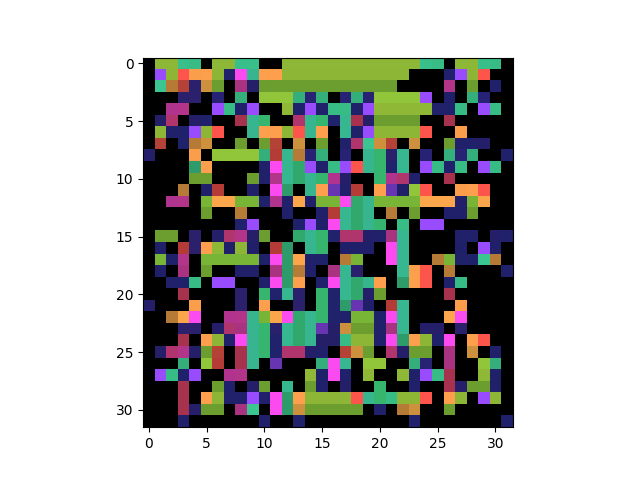

In [155]:
pixCol.drawPlot()

### Analysis

The strategy of looking where a class shows up in the image and then looking at what is in that location in the previous image seems good, but still difficult. I wouldn't say I have no understanding, but it's definitely not 100%. Tools to more easily cross reference between NDSP and the previous image would make it much easier.

In [125]:
#############################
                       ######
ns.set("block1.maxpool")     ####
                       ######
#############################
#   torch.Size([1, 64, 32, 32]) <-- block1.maxpool           - block1.maxpool._1af_1024dp_64dim_.bin


In [39]:
ns(
filename = "block1.maxpool._1af_1024dp_64dim_.bin",
num_channels = 64,
pix_dim = 32,
)

ns(
activ_img = (np.fromfile(dirname+"/"+filename, dtype=np.float32)
            .reshape((pix_dim, pix_dim, num_channels))
            .transpose((2,0,1))
            )
)
activ_img.shape

(64, 32, 32)

### Clustering

#### Hierarchal Linking

In [41]:
ns(pixels = activ_img.reshape((num_channels,-1)))

In [42]:
ns(pix_link = hierarchy.linkage(
    pixels.transpose([1,0]),
    metric='euclidean',
    method='single',
    ))

In [43]:
#link_tree = hierarchy.to_tree(pix_link)

#### Dendrogram

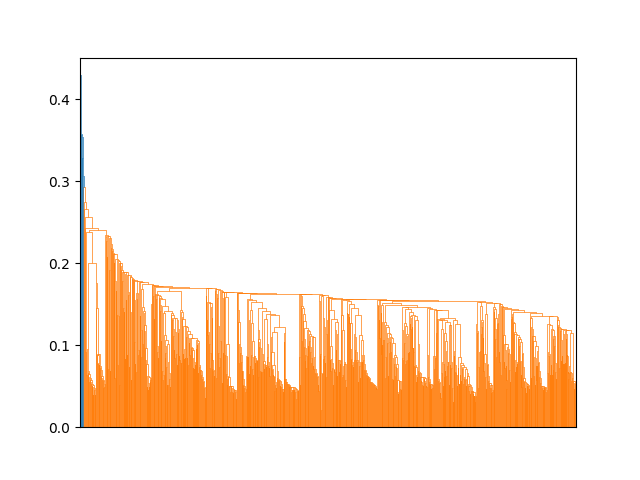

In [44]:
_fig_ax = plt.subplots()
ns(
dendro_fig = _fig_ax[0],
dentro_ax = _fig_ax[1],
)

acf = dentro_ax.add_collection
# dendrogram doesn't have linewidth setting
# but it can be bodged on by hacking the axes
def linmodacf(colec):
    colec.set(linewidth=0.5,)
    acf(colec)
dendro_ax.add_collection = linmodacf

ddg=hierarchy.dendrogram(pix_link,
           count_sort='ascending',
           no_labels=True,
           ax=dentro_ax,
           )

In [47]:
dentro_ax.set_xlim([-1000,12000])
dentro_ax.set_ylim([-0.02,0.5])

(-0.02, 0.5)

#### Classify by Hierarchy

In [48]:
ns(classif = hierarchy.fcluster(
    pix_link,
    0.18,
    criterion='distance',
    depth=2,
    ))

classif.min(), classif.max()

(1, 51)

#### Classify by K-Means

In [80]:
num_classes = 30
_kmean_ = vq.kmeans2(pixels.T, num_classes, minit='points')
ns(km_centroids = _kmean_[0],
   km_classif = _kmean_[1] +1 ## plus 1 back from zero indexing
  )
km_classif.min(), km_classif.max()

(1, 30)

### Interactive Pixel Cluster Labeling

In [84]:
# Create a new Interactive Pixel Colorer giving it the pixel classes shaped back into an image (64x64 in this case)
ns(pixCol = InteractivePixCol(  km_classif.reshape((pix_dim,pix_dim))  ))

In [87]:
#pixCol.printClassif()

In [83]:
# Manually classified in NDSP
pixCol.loadClassif(
[ [[127,127,127],[239,193,120],[250,162,173],[239,247,174],[239,195,137],[237,162,141],[235,186,99],[251,234,202],[239,122,86],[149,254,147],[108,233,175],[116,246,180],[252,232,64],[195,250,158],[206,140,250],[120,229,252],[246,194,247],[244,119,66],[105,251,74],[217,247,202],[251,124,225],[237,249,188],[250,84,85],[150,80,226],[244,85,215],[170,241,219],[100,228,223],[203,179,252],[201,244,100],[181,247,231],[230,191,77],[110,240,142],[161,245,160],[249,207,208],[154,141,237],[121,215,241],[60,94,247],[237,150,214],[246,101,240],[118,232,115],[253,236,114],[166,250,191],[222,198,254]], ["unclassed","class2","class3","class4","class5","class6","class7","class8","class9","class10","class11","class12","class13","class14","class15","class16","class17","class18","class19","class20","class21","class22","class23","class24","class25","class26","class27","class28","class29","class30","class31","class32","class33","class34","class35","class36","class37","class38","class39","class40","class41","class42","class43"], [6,1,1,9,9,1,1,1,9,9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,9,16,1,1,1,9,16,1,6,8,8,18,32,15,8,15,28,14,10,15,8,8,8,8,8,8,8,8,8,8,15,5,14,33,23,8,8,18,33,2,6,9,38,33,31,29,19,26,28,14,19,19,19,19,19,19,19,19,19,19,19,19,26,26,9,17,28,12,19,19,25,2,6,14,29,37,34,27,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,9,12,19,19,19,19,19,2,6,14,27,28,34,5,9,23,23,9,11,11,29,23,9,15,9,9,23,9,11,11,11,11,19,30,23,9,5,9,23,2,6,14,25,19,25,26,14,33,28,14,21,20,7,28,14,5,34,31,33,19,7,7,7,7,14,33,28,32,5,14,33,2,9,8,15,28,8,8,9,24,23,14,10,15,8,18,14,10,24,31,33,8,8,8,8,8,18,24,23,32,5,14,23,16,4,19,35,23,24,29,19,19,19,13,19,19,10,29,13,19,19,25,37,9,40,31,10,29,19,19,19,25,25,14,19,25,6,14,33,23,32,30,19,19,19,19,19,14,31,26,19,19,19,19,19,14,21,34,31,27,19,19,19,19,19,19,19,25,6,14,24,39,42,15,8,8,8,8,15,34,31,33,9,15,23,23,18,18,5,34,31,5,9,23,23,9,5,9,23,2,6,14,29,20,13,13,14,29,20,13,25,28,31,34,14,5,26,14,14,14,5,26,25,27,14,33,28,32,5,14,33,2,6,14,29,26,19,19,19,24,30,19,30,36,31,24,14,10,30,19,37,14,10,30,19,19,18,24,23,32,15,18,33,2,6,14,27,23,9,10,10,10,10,10,29,37,31,10,41,10,10,10,34,14,10,10,10,10,10,10,10,41,10,10,29,2,19,12,12,19,12,19,14,29,26,19,26,12,19,19,19,19,14,31,34,14,21,26,19,19,19,19,19,19,19,14,33,15,4,8,8,8,15,5,14,33,23,9,8,8,15,23,9,15,34,31,34,14,5,23,23,5,9,23,8,15,5,14,24,16,4,13,13,14,33,5,14,25,28,14,13,14,35,34,14,5,26,25,26,14,25,28,31,5,14,29,20,25,26,14,14,22,4,19,19,37,34,15,19,19,19,19,30,36,31,23,14,5,12,19,19,19,30,36,31,5,14,24,30,19,30,9,19,26,4,10,29,28,14,10,10,10,10,10,29,34,18,10,41,20,23,31,10,10,15,34,31,5,14,31,10,10,5,9,31,16,4,19,26,28,12,19,19,19,19,19,26,28,31,30,19,26,28,31,37,14,15,24,31,15,23,29,26,26,26,14,29,22,4,8,15,23,9,5,9,9,8,8,15,34,42,10,8,15,34,31,34,14,10,24,42,10,18,33,23,9,5,14,33,2,4,14,35,28,34,5,14,29,33,14,5,34,31,33,14,5,34,31,37,14,13,14,35,20,14,35,28,32,5,14,33,2,6,14,24,23,32,5,14,29,37,14,10,24,31,37,14,5,34,31,30,19,30,34,31,20,14,24,23,32,5,14,33,2,6,14,31,10,35,5,14,27,28,14,10,10,35,34,14,5,34,31,10,10,29,34,31,5,14,31,10,35,5,14,33,2,6,14,29,37,34,5,14,25,28,14,21,34,31,34,14,16,12,26,7,7,7,28,31,5,14,14,14,34,5,14,33,2,6,14,33,28,32,15,8,15,28,14,5,34,31,34,14,12,4,16,8,8,15,36,31,10,8,15,28,32,15,9,33,2,6,14,25,28,14,19,19,35,28,14,5,26,25,26,14,25,4,24,29,19,30,26,14,19,19,26,28,32,29,19,25,2,6,19,19,19,19,19,19,33,28,14,15,28,19,19,19,19,36,33,30,19,19,19,19,19,19,19,19,32,30,19,19,2,6,9,23,23,9,11,24,29,28,14,10,35,11,11,11,30,37,29,35,11,11,11,29,5,9,23,28,34,35,11,30,2,6,14,33,28,32,20,7,7,28,14,7,14,31,20,7,7,37,14,14,14,21,20,7,25,14,33,28,14,7,7,7,2,6,14,33,28,32,15,8,15,28,8,15,36,31,15,8,8,8,8,18,14,5,23,8,8,9,24,15,19,5,8,8,16,6,14,33,28,14,19,19,26,28,18,15,34,31,29,19,19,19,19,19,13,25,23,31,29,19,19,19,29,5,19,19,25,6,14,17,25,3,3,3,3,14,14,22,17,17,22,3,3,3,3,3,3,3,14,17,22,3,3,3,3,3,3,3,3] ]
)

In [134]:
# k-means, colored classes near cheese location, then reclassified those in NDSP
pixCol.loadClassif(
    #[ [[0,0,0],[252,254,76],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[75,180,250],[0,0,0],[254,247,76],[238,184,71],[0,0,0],[0,0,0],[0,0,0],[250,189,75],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[252,195,75],[0,0,0],[0,0,0],[0,0,0],[253,217,75],[0,0,0],[0,0,0],[223,147,237],[112,248,170],[250,199,199],[251,131,61],[246,228,162],[140,244,231],[145,81,243]], ["_1","_2","_3","_4","_5","_6","_7","_8","_9","_10","_11","_12","_13","_14","_15","_16","_17","_18","_19","_20","_21","_22","_23","_24","_25","_26","_27","_28","_29","_30","class31","class32","class33","class34","class35","class36","class37"], [14,0,0,11,36,34,0,0,11,11,34,24,0,0,0,0,0,0,0,0,0,0,0,0,11,36,24,0,0,11,36,24,14,11,15,11,18,12,15,34,36,21,12,12,15,15,15,15,15,15,15,15,15,15,15,2,21,10,36,11,15,11,10,24,14,11,17,3,25,29,29,4,36,7,29,29,29,29,29,29,29,29,29,29,29,29,4,2,7,31,36,36,29,29,4,24,14,21,10,3,25,2,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,31,36,36,26,36,36,24,14,7,10,36,36,2,11,36,36,11,28,28,28,36,11,34,36,36,36,36,28,28,28,28,36,36,36,36,2,11,36,24,14,7,4,36,7,2,21,10,36,21,20,16,16,36,21,20,10,18,10,7,16,16,16,16,25,10,36,18,2,21,10,24,11,15,34,36,11,15,11,5,5,21,12,12,15,11,21,12,5,18,12,11,15,15,15,15,11,5,5,18,2,21,5,33,30,25,34,36,17,29,29,29,29,16,29,25,29,29,16,29,29,4,36,11,29,3,29,29,29,29,29,4,2,7,7,4,7,25,5,5,18,22,36,36,36,36,36,25,18,22,36,36,36,36,36,21,20,3,18,2,36,36,36,36,26,36,36,19,14,21,5,5,17,12,15,15,15,15,34,36,18,36,11,34,36,11,15,17,20,10,18,2,11,36,36,36,2,11,36,24,14,21,10,16,16,16,25,3,16,16,4,36,18,10,21,20,36,7,25,25,20,36,4,2,21,10,36,18,2,21,10,24,14,21,10,3,36,22,36,5,22,22,22,36,18,5,21,12,36,36,3,25,12,36,36,22,11,5,5,18,12,11,10,24,14,21,10,36,11,29,29,29,29,29,2,36,17,29,29,29,29,20,36,21,29,29,29,29,29,29,29,29,29,29,20,24,14,36,4,36,36,26,25,10,3,22,22,36,36,22,22,22,25,18,10,21,20,22,22,26,22,22,22,22,26,25,5,24,11,15,15,15,34,2,21,10,36,11,15,15,34,36,11,34,36,18,10,21,20,36,36,2,11,11,15,34,2,21,5,32,7,16,16,25,3,2,7,4,36,7,16,25,18,10,21,20,36,4,4,7,4,36,18,2,21,10,16,4,2,7,7,4,30,22,22,3,25,12,36,36,15,36,22,3,18,5,21,20,36,36,36,36,22,36,18,2,21,5,22,22,2,36,36,22,11,29,2,36,7,29,29,29,29,29,2,36,17,29,29,20,36,17,29,29,34,36,18,2,21,17,29,29,2,11,17,32,30,22,22,36,36,26,22,22,22,22,22,36,18,22,22,22,36,18,3,25,12,5,18,12,21,10,3,22,2,21,10,4,11,15,34,36,36,2,11,11,15,15,34,36,17,12,15,34,36,18,10,21,12,5,17,12,17,10,36,36,2,21,10,24,7,25,20,36,18,2,21,18,3,25,20,10,18,3,25,20,10,18,10,7,16,25,18,16,25,20,36,18,2,21,10,24,7,25,5,5,18,2,21,10,3,25,12,5,18,3,25,20,10,18,12,36,22,3,18,2,25,5,5,18,2,21,10,24,14,21,17,29,18,2,21,10,36,21,29,29,20,10,21,20,36,17,29,29,2,36,18,2,21,17,29,18,2,21,10,24,14,21,10,3,25,2,7,4,36,21,20,3,18,10,21,6,6,26,16,16,4,36,18,2,7,7,25,25,2,21,10,24,14,21,10,36,18,12,15,34,36,21,20,10,18,10,21,6,6,6,15,15,34,36,18,12,15,34,36,18,12,11,10,24,14,7,4,36,7,29,25,20,36,21,20,36,4,36,7,4,6,36,29,29,4,36,7,29,29,4,36,18,29,29,4,24,14,36,36,36,36,36,25,10,36,21,12,36,36,36,36,36,36,18,22,36,36,36,36,26,36,36,36,18,22,36,36,24,14,11,36,36,11,28,17,10,36,21,12,12,28,28,28,35,36,18,12,28,28,28,28,2,11,36,36,36,28,28,35,24,14,21,10,36,18,2,16,4,36,7,16,25,18,2,16,4,7,7,25,25,20,16,16,2,21,10,36,7,16,16,4,24,14,21,10,36,18,12,15,34,36,11,34,36,18,12,15,15,15,15,11,21,20,36,15,15,11,5,12,15,2,11,15,33,14,21,10,36,7,29,29,4,36,11,34,36,18,29,29,29,29,29,29,16,4,36,17,29,29,29,29,29,2,7,36,4,14,7,4,24,19,19,19,19,7,7,4,36,4,4,19,19,19,19,19,19,19,7,4,4,19,19,19,19,19,19,19,19] ]
    
    # the class near the cheese was lumped together too much. Broke it up
    #[ [[0,0,0],[252,254,76],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[75,180,250],[0,0,0],[254,247,76],[238,184,71],[0,0,0],[0,0,0],[0,0,0],[250,189,75],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[252,195,75],[0,0,0],[0,0,0],[0,0,0],[253,217,75],[0,0,0],[0,0,0],[223,147,237],[112,248,170],[250,199,199],[251,131,61],[246,228,162],[140,244,231],[145,81,243],[233,113,98],[241,109,158],[170,246,192]], ["_1","_2","_3","_4","_5","_6","_7","_8","_9","_10","_11","_12","_13","_14","_15","_16","_17","_18","_19","_20","_21","_22","_23","_24","_25","_26","_27","_28","_29","_30","class31","class32","class33","class34","class35","class36","class37","class38","class39","class40"], [14,0,0,11,37,34,0,0,11,11,34,24,0,0,0,0,0,0,0,0,0,0,0,0,11,37,24,0,0,11,37,24,14,11,15,11,18,12,15,34,38,21,12,12,15,15,15,15,15,15,15,15,15,15,15,2,21,10,38,11,15,11,10,24,14,11,17,3,25,29,29,4,38,7,29,29,29,29,29,29,29,29,29,29,29,29,4,2,7,31,38,36,29,29,4,24,14,21,10,3,25,2,39,39,36,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,36,31,38,39,26,39,39,24,14,7,10,38,38,2,11,37,38,11,28,28,28,36,11,34,37,37,36,36,28,28,28,28,36,36,38,37,2,11,37,24,14,7,4,38,7,2,21,10,38,21,20,16,16,38,21,20,10,18,10,7,16,16,16,16,25,10,38,18,2,21,10,24,11,15,34,36,11,15,11,5,5,21,12,12,15,11,21,12,5,18,12,11,15,15,15,15,11,5,5,18,2,21,5,33,30,25,34,38,17,29,29,29,29,16,29,25,29,29,16,29,29,4,38,11,29,3,29,29,29,29,29,4,2,7,7,4,7,25,5,5,18,22,39,39,39,39,39,25,18,22,39,39,39,39,36,21,20,3,18,2,39,39,36,39,26,39,39,19,14,21,5,5,17,12,15,15,15,15,34,38,18,36,11,34,37,11,15,17,20,10,18,2,11,37,38,37,2,11,37,24,14,21,10,16,16,16,25,3,16,16,4,38,18,10,21,20,38,7,25,25,20,38,4,2,21,10,38,18,2,21,10,24,14,21,10,3,36,22,39,5,22,22,22,38,18,5,21,12,36,39,3,25,12,36,39,22,11,5,5,18,12,11,10,24,14,21,10,38,11,29,29,29,29,29,2,38,17,29,29,29,29,20,38,21,29,29,29,29,29,29,29,29,29,29,20,24,14,36,4,38,39,26,25,10,3,22,22,36,39,22,22,22,25,18,10,21,20,22,22,26,22,22,22,22,26,25,5,24,11,15,15,15,34,2,21,10,38,11,15,15,34,36,11,34,38,18,10,21,20,37,37,2,11,11,15,34,2,21,5,32,7,16,16,25,3,2,7,4,38,7,16,25,18,10,21,20,38,4,4,7,4,38,18,2,21,10,16,4,2,7,7,4,30,22,22,3,25,12,39,39,15,39,22,3,18,5,21,20,37,36,39,39,22,38,18,2,21,5,22,22,2,36,36,22,11,29,2,38,7,29,29,29,29,29,2,38,17,29,29,20,37,17,29,29,34,38,18,2,21,17,29,29,2,11,17,32,30,22,22,38,36,26,22,22,22,22,22,38,18,22,22,22,38,18,3,25,12,5,18,12,21,10,3,22,2,21,10,4,11,15,34,38,37,2,11,11,15,15,34,38,17,12,15,34,38,18,10,21,12,5,17,12,17,10,38,37,2,21,10,24,7,25,20,38,18,2,21,18,3,25,20,10,18,3,25,20,10,18,10,7,16,25,18,16,25,20,38,18,2,21,10,24,7,25,5,5,18,2,21,10,3,25,12,5,18,3,25,20,10,18,12,39,22,3,18,2,25,5,5,18,2,21,10,24,14,21,17,29,18,2,21,10,38,21,29,29,20,10,21,20,38,17,29,29,2,38,18,2,21,17,29,18,2,21,10,24,14,21,10,3,25,2,7,4,38,21,20,3,18,10,21,6,6,26,16,16,4,38,18,2,7,7,25,25,2,21,10,24,14,21,10,38,18,12,15,34,38,21,20,10,18,10,21,6,6,6,15,15,34,38,18,12,15,34,38,18,12,11,10,24,14,7,4,38,7,29,25,20,38,21,20,38,4,38,7,4,6,37,29,29,4,38,7,29,29,4,38,18,29,29,4,24,14,39,39,36,39,39,25,10,38,21,12,36,39,39,39,39,38,18,22,39,39,39,39,26,39,39,38,18,22,39,39,24,14,11,37,38,11,28,17,10,38,21,12,12,28,28,28,35,38,18,12,28,28,28,28,2,11,37,38,38,28,28,35,24,14,21,10,38,18,2,16,4,38,7,16,25,18,2,16,4,7,7,25,25,20,16,16,2,21,10,38,7,16,16,4,24,14,21,10,38,18,12,15,34,36,11,34,38,18,12,15,15,15,15,11,21,20,37,15,15,11,5,12,15,2,11,15,33,14,21,10,38,7,29,29,4,38,11,34,38,18,29,29,29,29,29,29,16,4,37,17,29,29,29,29,29,2,7,36,4,14,7,4,24,19,19,19,19,7,7,4,38,4,4,19,19,19,19,19,19,19,7,4,4,19,19,19,19,19,19,19,19] ]
    
    # did some color work. It seems like the concepts are:
    # - deep blue -- mouse
    # - yellow -- cheese
    # - red -- dead end. cannot pass
    # - pink -- outer corner. can pass this way.
    # - yellow green -- horizontal passageways.
    # - blue green -- vertical passageways.
    #[[[34, 106, 31], [252, 254, 76], [64, 213, 146], [235, 78, 70], [188, 75, 251], [0, 0, 0], [76, 83, 254], [173, 76, 254], [254, 247, 76], [238, 184, 71], [60, 203, 139], [229, 94, 68], [215, 106, 64], [250, 189, 75], [32, 105, 31], [150, 205, 61], [131, 192, 57], [217, 65, 75], [48, 162, 119], [35, 104, 31], [48, 160, 123], [45, 151, 106], [142, 204, 61], [252, 195, 75], [32, 106, 31], [181, 76, 253], [205, 74, 247], [253, 217, 75], [124, 182, 54], [142, 186, 55], [223, 147, 237], [254, 247, 76], [250, 199, 199], [251, 131, 61], [245, 73, 190], [140, 244, 231], [224, 137, 67], [206, 76, 253], [61, 203, 133], [144, 206, 62]], ["_1", "_2", "_3", "_4", "_5", "_6", "_7", "_8", "_9", "_10", "_11", "_12", "_13", "_14", "_15", "_16", "_17", "_18", "_19", "_20", "_21", "_22", "_23", "_24", "_25", "_26", "_27", "_28", "_29", "_30", "class31", "class32", "class33", "class34", "class35", "class36", "class37", "class38", "class39", "class40"], [14, 0, 0, 11, 37, 34, 0, 0, 11, 11, 34, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 37, 24, 0, 0, 11, 37, 24, 14, 11, 15, 11, 18, 12, 15, 34, 38, 21, 12, 12, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 2, 21, 10, 38, 11, 15, 11, 10, 24, 14, 11, 17, 3, 25, 29, 29, 4, 38, 7, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 4, 2, 7, 31, 38, 36, 29, 29, 4, 24, 14, 21, 10, 3, 25, 2, 39, 39, 36, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 36, 31, 38, 39, 26, 39, 39, 24, 14, 7, 10, 38, 38, 2, 11, 37, 38, 11, 28, 28, 28, 36, 11, 34, 37, 37, 36, 36, 28, 28, 28, 28, 36, 36, 38, 37, 2, 11, 37, 24, 14, 7, 4, 38, 7, 2, 21, 10, 38, 21, 20, 16, 16, 38, 21, 20, 10, 18, 10, 7, 16, 16, 16, 16, 25, 10, 38, 18, 2, 21, 10, 24, 11, 15, 34, 36, 11, 15, 11, 5, 5, 21, 12, 12, 15, 11, 21, 12, 5, 18, 12, 11, 15, 15, 15, 15, 11, 5, 5, 18, 2, 21, 5, 33, 30, 25, 34, 38, 17, 29, 29, 29, 29, 16, 29, 25, 29, 29, 16, 29, 29, 4, 38, 11, 29, 3, 29, 29, 29, 29, 29, 4, 2, 7, 7, 4, 7, 25, 5, 5, 18, 22, 39, 39, 39, 39, 39, 25, 18, 22, 39, 39, 39, 39, 36, 21, 20, 3, 18, 2, 39, 39, 36, 39, 26, 39, 39, 19, 14, 21, 5, 5, 17, 12, 15, 15, 15, 15, 34, 38, 18, 36, 11, 34, 37, 11, 15, 17, 20, 10, 18, 2, 11, 37, 38, 37, 2, 11, 37, 24, 14, 21, 10, 16, 16, 16, 25, 3, 16, 16, 4, 38, 18, 10, 21, 20, 38, 7, 25, 25, 20, 38, 4, 2, 21, 10, 38, 18, 2, 21, 10, 24, 14, 21, 10, 3, 36, 22, 39, 5, 22, 22, 22, 38, 18, 5, 21, 12, 36, 39, 3, 25, 12, 36, 39, 22, 11, 5, 5, 18, 12, 11, 10, 24, 14, 21, 10, 38, 11, 29, 29, 29, 29, 29, 2, 38, 17, 29, 29, 29, 29, 20, 38, 21, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 20, 24, 14, 36, 4, 38, 39, 26, 25, 10, 3, 22, 22, 36, 39, 22, 22, 22, 25, 18, 10, 21, 20, 22, 22, 26, 22, 22, 22, 22, 26, 25, 5, 24, 11, 15, 15, 15, 34, 2, 21, 10, 38, 11, 15, 15, 34, 36, 11, 34, 38, 18, 10, 21, 20, 37, 37, 2, 11, 11, 15, 34, 2, 21, 5, 32, 7, 16, 16, 25, 3, 2, 7, 4, 38, 7, 16, 25, 18, 10, 21, 20, 38, 4, 4, 7, 4, 38, 18, 2, 21, 10, 16, 4, 2, 7, 7, 4, 30, 22, 22, 3, 25, 12, 39, 39, 15, 39, 22, 3, 18, 5, 21, 20, 37, 36, 39, 39, 22, 38, 18, 2, 21, 5, 22, 22, 2, 36, 36, 22, 11, 29, 2, 38, 7, 29, 29, 29, 29, 29, 2, 38, 17, 29, 29, 20, 37, 17, 29, 29, 34, 38, 18, 2, 21, 17, 29, 29, 2, 11, 17, 32, 30, 22, 22, 38, 36, 26, 22, 22, 22, 22, 22, 38, 18, 22, 22, 22, 38, 18, 3, 25, 12, 5, 18, 12, 21, 10, 3, 22, 2, 21, 10, 4, 11, 15, 34, 38, 37, 2, 11, 11, 15, 15, 34, 38, 17, 12, 15, 34, 38, 18, 10, 21, 12, 5, 17, 12, 17, 10, 38, 37, 2, 21, 10, 24, 7, 25, 20, 38, 18, 2, 21, 18, 3, 25, 20, 10, 18, 3, 25, 20, 10, 18, 10, 7, 16, 25, 18, 16, 25, 20, 38, 18, 2, 21, 10, 24, 7, 25, 5, 5, 18, 2, 21, 10, 3, 25, 12, 5, 18, 3, 25, 20, 10, 18, 12, 39, 22, 3, 18, 2, 25, 5, 5, 18, 2, 21, 10, 24, 14, 21, 17, 29, 18, 2, 21, 10, 38, 21, 29, 29, 20, 10, 21, 20, 38, 17, 29, 29, 2, 38, 18, 2, 21, 17, 29, 18, 2, 21, 10, 24, 14, 21, 10, 3, 25, 2, 7, 4, 38, 21, 20, 3, 18, 10, 21, 6, 6, 26, 16, 16, 4, 38, 18, 2, 7, 7, 25, 25, 2, 21, 10, 24, 14, 21, 10, 38, 18, 12, 15, 34, 38, 21, 20, 10, 18, 10, 21, 6, 6, 6, 15, 15, 34, 38, 18, 12, 15, 34, 38, 18, 12, 11, 10, 24, 14, 7, 4, 38, 7, 29, 25, 20, 38, 21, 20, 38, 4, 38, 7, 4, 6, 37, 29, 29, 4, 38, 7, 29, 29, 4, 38, 18, 29, 29, 4, 24, 14, 39, 39, 36, 39, 39, 25, 10, 38, 21, 12, 36, 39, 39, 39, 39, 38, 18, 22, 39, 39, 39, 39, 26, 39, 39, 38, 18, 22, 39, 39, 24, 14, 11, 37, 38, 11, 28, 17, 10, 38, 21, 12, 12, 28, 28, 28, 35, 38, 18, 12, 28, 28, 28, 28, 2, 11, 37, 38, 38, 28, 28, 35, 24, 14, 21, 10, 38, 18, 2, 16, 4, 38, 7, 16, 25, 18, 2, 16, 4, 7, 7, 25, 25, 20, 16, 16, 2, 21, 10, 38, 7, 16, 16, 4, 24, 14, 21, 10, 38, 18, 12, 15, 34, 36, 11, 34, 38, 18, 12, 15, 15, 15, 15, 11, 21, 20, 37, 15, 15, 11, 5, 12, 15, 2, 11, 15, 33, 14, 21, 10, 38, 7, 29, 29, 4, 38, 11, 34, 38, 18, 29, 29, 29, 29, 29, 29, 16, 4, 37, 17, 29, 29, 29, 29, 29, 2, 7, 36, 4, 14, 7, 4, 24, 19, 19, 19, 19, 7, 7, 4, 38, 4, 4, 19, 19, 19, 19, 19, 19, 19, 7, 4, 4, 19, 19, 19, 19, 19, 19, 19, 19]]
    # highlighted confusing clusters. trying to understand corners.
    #[[[34, 106, 31], [252, 254, 76], [76, 254, 250], [31, 34, 106], [253, 76, 225], [247, 94, 74], [76, 83, 254], [173, 76, 254], [254, 247, 76], [238, 184, 71], [60, 203, 139], [176, 241, 72], [215, 106, 64], [250, 189, 75], [32, 105, 31], [150, 205, 61], [131, 192, 57], [165, 76, 254], [48, 162, 119], [35, 104, 31], [48, 160, 123], [45, 151, 106], [142, 204, 61], [252, 195, 75], [32, 106, 31], [32, 31, 104], [120, 55, 185], [253, 217, 75], [124, 182, 54], [142, 186, 55], [223, 147, 237], [254, 247, 76], [250, 199, 199], [251, 131, 61], [192, 57, 124], [140, 244, 231], [127, 53, 178], [56, 50, 167], [76, 254, 254], [144, 206, 62]], ["_1", "_2", "_3 (?)", "_4", "_5", "_6", "_7", "_8", "_9", "_10", "_11", "_12", "_13", "_14", "_15", "_16", "_17", "_18", "_19", "_20", "_21", "_22", "_23", "_24", "_25", "_26", "_27", "_28", "_29", "_30", "class31", "class32", "class33", "class34", "class35", "class36", "class37", "class38", "class39 (?)", "class40"], [14, 0, 0, 11, 37, 34, 0, 0, 11, 11, 34, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 37, 24, 0, 0, 11, 37, 24, 14, 11, 15, 11, 18, 12, 15, 34, 38, 21, 12, 12, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 2, 21, 10, 38, 11, 15, 11, 10, 24, 14, 11, 17, 3, 25, 29, 29, 4, 38, 7, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 4, 2, 7, 31, 38, 36, 29, 29, 4, 24, 14, 21, 10, 3, 25, 2, 39, 39, 36, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 36, 31, 38, 39, 26, 39, 39, 24, 14, 7, 10, 38, 38, 2, 11, 37, 38, 11, 28, 28, 28, 36, 11, 34, 37, 37, 36, 36, 28, 28, 28, 28, 36, 36, 38, 37, 2, 11, 37, 24, 14, 7, 4, 38, 7, 2, 21, 10, 38, 21, 20, 16, 16, 38, 21, 20, 10, 18, 10, 7, 16, 16, 16, 16, 25, 10, 38, 18, 2, 21, 10, 24, 11, 15, 34, 36, 11, 15, 11, 5, 5, 21, 12, 12, 15, 11, 21, 12, 5, 18, 12, 11, 15, 15, 15, 15, 11, 5, 5, 18, 2, 21, 5, 33, 30, 25, 34, 38, 17, 29, 29, 29, 29, 16, 29, 25, 29, 29, 16, 29, 29, 4, 38, 11, 29, 3, 29, 29, 29, 29, 29, 4, 2, 7, 7, 4, 7, 25, 5, 5, 18, 22, 39, 39, 39, 39, 39, 25, 18, 22, 39, 39, 39, 39, 36, 21, 20, 3, 18, 2, 39, 39, 36, 39, 26, 39, 39, 19, 14, 21, 5, 5, 17, 12, 15, 15, 15, 15, 34, 38, 18, 36, 11, 34, 37, 11, 15, 17, 20, 10, 18, 2, 11, 37, 38, 37, 2, 11, 37, 24, 14, 21, 10, 16, 16, 16, 25, 3, 16, 16, 4, 38, 18, 10, 21, 20, 38, 7, 25, 25, 20, 38, 4, 2, 21, 10, 38, 18, 2, 21, 10, 24, 14, 21, 10, 3, 36, 22, 39, 5, 22, 22, 22, 38, 18, 5, 21, 12, 36, 39, 3, 25, 12, 36, 39, 22, 11, 5, 5, 18, 12, 11, 10, 24, 14, 21, 10, 38, 11, 29, 29, 29, 29, 29, 2, 38, 17, 29, 29, 29, 29, 20, 38, 21, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 20, 24, 14, 36, 4, 38, 39, 26, 25, 10, 3, 22, 22, 36, 39, 22, 22, 22, 25, 18, 10, 21, 20, 22, 22, 26, 22, 22, 22, 22, 26, 25, 5, 24, 11, 15, 15, 15, 34, 2, 21, 10, 38, 11, 15, 15, 34, 36, 11, 34, 38, 18, 10, 21, 20, 37, 37, 2, 11, 11, 15, 34, 2, 21, 5, 32, 7, 16, 16, 25, 3, 2, 7, 4, 38, 7, 16, 25, 18, 10, 21, 20, 38, 4, 4, 7, 4, 38, 18, 2, 21, 10, 16, 4, 2, 7, 7, 4, 30, 22, 22, 3, 25, 12, 39, 39, 15, 39, 22, 3, 18, 5, 21, 20, 37, 36, 39, 39, 22, 38, 18, 2, 21, 5, 22, 22, 2, 36, 36, 22, 11, 29, 2, 38, 7, 29, 29, 29, 29, 29, 2, 38, 17, 29, 29, 20, 37, 17, 29, 29, 34, 38, 18, 2, 21, 17, 29, 29, 2, 11, 17, 32, 30, 22, 22, 38, 36, 26, 22, 22, 22, 22, 22, 38, 18, 22, 22, 22, 38, 18, 3, 25, 12, 5, 18, 12, 21, 10, 3, 22, 2, 21, 10, 4, 11, 15, 34, 38, 37, 2, 11, 11, 15, 15, 34, 38, 17, 12, 15, 34, 38, 18, 10, 21, 12, 5, 17, 12, 17, 10, 38, 37, 2, 21, 10, 24, 7, 25, 20, 38, 18, 2, 21, 18, 3, 25, 20, 10, 18, 3, 25, 20, 10, 18, 10, 7, 16, 25, 18, 16, 25, 20, 38, 18, 2, 21, 10, 24, 7, 25, 5, 5, 18, 2, 21, 10, 3, 25, 12, 5, 18, 3, 25, 20, 10, 18, 12, 39, 22, 3, 18, 2, 25, 5, 5, 18, 2, 21, 10, 24, 14, 21, 17, 29, 18, 2, 21, 10, 38, 21, 29, 29, 20, 10, 21, 20, 38, 17, 29, 29, 2, 38, 18, 2, 21, 17, 29, 18, 2, 21, 10, 24, 14, 21, 10, 3, 25, 2, 7, 4, 38, 21, 20, 3, 18, 10, 21, 6, 6, 26, 16, 16, 4, 38, 18, 2, 7, 7, 25, 25, 2, 21, 10, 24, 14, 21, 10, 38, 18, 12, 15, 34, 38, 21, 20, 10, 18, 10, 21, 6, 6, 6, 15, 15, 34, 38, 18, 12, 15, 34, 38, 18, 12, 11, 10, 24, 14, 7, 4, 38, 7, 29, 25, 20, 38, 21, 20, 38, 4, 38, 7, 4, 6, 37, 29, 29, 4, 38, 7, 29, 29, 4, 38, 18, 29, 29, 4, 24, 14, 39, 39, 36, 39, 39, 25, 10, 38, 21, 12, 36, 39, 39, 39, 39, 38, 18, 22, 39, 39, 39, 39, 26, 39, 39, 38, 18, 22, 39, 39, 24, 14, 11, 37, 38, 11, 28, 17, 10, 38, 21, 12, 12, 28, 28, 28, 35, 38, 18, 12, 28, 28, 28, 28, 2, 11, 37, 38, 38, 28, 28, 35, 24, 14, 21, 10, 38, 18, 2, 16, 4, 38, 7, 16, 25, 18, 2, 16, 4, 7, 7, 25, 25, 20, 16, 16, 2, 21, 10, 38, 7, 16, 16, 4, 24, 14, 21, 10, 38, 18, 12, 15, 34, 36, 11, 34, 38, 18, 12, 15, 15, 15, 15, 11, 21, 20, 37, 15, 15, 11, 5, 12, 15, 2, 11, 15, 33, 14, 21, 10, 38, 7, 29, 29, 4, 38, 11, 34, 38, 18, 29, 29, 29, 29, 29, 29, 16, 4, 37, 17, 29, 29, 29, 29, 29, 2, 7, 36, 4, 14, 7, 4, 24, 19, 19, 19, 19, 7, 7, 4, 38, 4, 4, 19, 19, 19, 19, 19, 19, 19, 7, 4, 4, 19, 19, 19, 19, 19, 19, 19, 19]]
    # broke confusing clusters up in NDSP
    #[ [[34,106,31],[252,254,76],[76,254,250],[31,34,106],[253,76,225],[247,94,74],[76,83,254],[173,76,254],[254,247,76],[238,184,71],[60,203,139],[176,241,72],[215,106,64],[250,189,75],[32,105,31],[150,205,61],[131,192,57],[165,76,254],[48,162,119],[35,104,31],[48,160,123],[45,151,106],[142,204,61],[252,195,75],[32,106,31],[32,31,104],[120,55,185],[253,217,75],[124,182,54],[142,186,55],[223,147,237],[254,247,76],[250,199,199],[251,131,61],[192,57,124],[140,244,231],[127,53,178],[56,50,167],[76,254,254],[144,206,62],[230,245,111],[220,246,170],[240,168,115],[242,160,150],[251,207,173]], ["_1","_2","_3 (?)","_4","_5","_6","_7","_8","_9","_10","_11","_12","_13","_14","_15","_16","_17","_18","_19","_20","_21","_22","_23","_24","_25","_26","_27","_28","_29","_30","class31","class32","class33","class34","class35","class36","class37","class38","class39 (?)","class40","class41","class42","class43","class44","class45"], [14,0,0,11,37,34,0,0,11,11,34,24,0,0,0,0,0,0,0,0,0,0,0,0,11,37,24,0,0,11,37,24,14,11,15,11,18,12,15,34,44,21,12,12,15,15,15,15,15,15,15,15,15,15,15,40,21,10,44,11,15,11,10,24,14,11,17,3,25,29,29,4,44,7,29,29,29,29,29,29,29,29,29,29,29,29,4,42,7,31,44,36,29,29,4,24,14,21,10,3,25,42,39,39,36,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,36,31,38,39,26,39,39,24,14,7,10,44,44,41,11,37,44,11,28,28,28,36,11,34,37,37,36,36,28,28,28,28,36,36,44,37,40,11,37,24,14,7,4,38,7,42,21,10,44,21,20,16,16,44,21,20,10,18,10,7,16,16,16,16,25,10,44,18,40,21,10,24,11,15,34,36,11,15,11,5,5,21,12,12,15,11,21,12,5,18,12,11,15,15,15,15,11,5,5,18,40,21,5,33,30,25,34,44,17,29,29,29,29,16,29,25,29,29,16,29,29,4,44,11,29,3,29,29,29,29,29,4,42,7,7,4,7,25,5,5,18,22,39,39,39,39,39,25,18,22,39,39,39,39,36,21,20,3,18,42,39,39,36,39,26,39,39,19,14,21,5,5,17,12,15,15,15,15,34,44,18,36,11,34,37,11,15,17,20,10,18,40,11,37,44,37,40,11,37,24,14,21,10,16,16,16,25,3,16,16,4,44,18,10,21,20,44,7,25,25,20,44,4,42,21,10,44,18,40,21,10,24,14,21,10,3,36,22,39,5,22,22,22,44,18,5,21,12,36,39,3,25,12,36,39,22,11,5,5,18,12,11,10,24,14,21,10,44,11,29,29,29,29,29,43,44,17,29,29,29,29,20,38,21,29,29,29,29,29,29,29,29,29,29,20,24,14,36,4,44,39,26,25,10,3,22,22,36,39,22,22,22,25,18,10,21,20,22,22,26,22,22,22,22,26,25,5,24,11,15,15,15,34,40,21,10,38,11,15,15,34,36,11,34,44,18,10,21,20,37,37,40,11,11,15,34,40,21,5,32,7,16,16,25,3,40,7,4,44,7,16,25,18,10,21,20,44,4,4,7,4,44,18,40,21,10,16,4,42,7,7,4,30,22,22,3,25,12,39,39,15,39,22,3,18,5,21,20,37,36,39,39,22,44,18,40,21,5,22,22,40,36,36,22,11,29,43,44,7,29,29,29,29,29,43,44,17,29,29,20,37,17,29,29,34,44,18,40,21,17,29,29,41,11,17,32,30,22,22,44,36,26,22,22,22,22,22,44,18,22,22,22,44,18,3,25,12,5,18,12,21,10,3,22,42,21,10,4,11,15,34,44,37,40,11,11,15,15,34,44,17,12,15,34,44,18,10,21,12,5,17,12,17,10,44,37,40,21,10,24,7,25,20,44,18,40,21,18,3,25,20,10,18,3,25,20,10,18,10,7,16,25,18,16,25,20,44,18,40,21,10,24,7,25,5,5,18,40,21,10,3,25,12,5,18,3,25,20,10,18,12,39,22,3,18,42,25,5,5,18,40,21,10,24,14,21,17,29,18,40,21,10,44,21,29,29,20,10,21,20,44,17,29,29,43,44,18,40,21,17,29,18,40,21,10,24,14,21,10,3,25,40,7,4,44,21,20,3,18,10,21,6,6,26,16,16,4,38,18,40,7,7,25,25,40,21,10,24,14,21,10,44,18,12,15,34,44,21,20,10,18,10,21,6,6,6,15,15,34,44,18,12,15,34,38,18,12,11,10,24,14,7,4,44,7,29,25,20,44,21,20,44,4,44,7,4,6,37,29,29,4,44,7,29,29,4,44,18,29,29,4,24,14,39,39,36,39,39,25,10,44,21,12,36,39,39,39,39,44,18,22,39,39,39,39,26,39,39,44,18,22,39,39,24,14,11,37,44,11,28,17,10,44,21,12,12,28,28,28,35,44,18,12,28,28,28,28,40,11,37,38,44,28,28,35,24,14,21,10,44,18,42,16,4,38,7,16,25,18,42,16,4,7,7,25,25,20,16,16,42,21,10,38,7,16,16,4,24,14,21,10,44,18,12,15,34,36,11,34,44,18,12,15,15,15,15,11,21,20,37,15,15,11,5,12,15,40,11,15,33,14,21,10,44,7,29,29,4,44,11,34,44,18,29,29,29,29,29,29,16,4,37,17,29,29,29,29,29,40,7,36,4,14,7,4,24,19,19,19,19,7,7,4,38,4,4,19,19,19,19,19,19,19,7,4,4,19,19,19,19,19,19,19,19] ]
    #[[[34, 106, 31], [252, 254, 76], [76, 254, 250], [229, 102, 68], [181, 54, 176], [247, 94, 74], [76, 83, 254], [37, 31, 106], [254, 247, 76], [238, 184, 71], [60, 203, 139], [176, 241, 72], [215, 106, 64], [250, 189, 75], [32, 105, 31], [150, 205, 61], [131, 192, 57], [31, 32, 105], [48, 162, 119], [35, 104, 31], [76, 254, 250], [45, 151, 106], [142, 204, 61], [252, 195, 75], [32, 106, 31], [229, 106, 68], [120, 55, 185], [253, 217, 75], [124, 182, 54], [142, 186, 55], [223, 147, 237], [254, 247, 76], [250, 199, 199], [251, 131, 61], [248, 75, 250], [246, 73, 243], [127, 53, 178], [58, 196, 154], [61, 205, 144], [144, 206, 62], [60, 202, 135], [220, 246, 170], [240, 168, 115], [249, 75, 250], [76, 254, 254]], ["_1", "_2", "_3 (?)", "_4", "_5", "_6", "_7", "_8", "_9", "_10", "_11", "_12", "_13", "_14", "_15", "_16", "_17", "_18", "_19", "_20", "_21 (??)", "_22", "_23", "_24", "_25", "_26", "_27", "_28", "_29", "_30", "class31", "class32", "class33", "class34", "class35", "class36", "class37", "class38", "class39 (?)", "class40", "class41", "class42", "class43", "class44", "class45 (??)"], [14, 0, 0, 11, 37, 34, 0, 0, 11, 11, 34, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 37, 24, 0, 0, 11, 37, 24, 14, 11, 15, 11, 18, 12, 15, 34, 44, 21, 12, 12, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 40, 21, 10, 44, 11, 15, 11, 10, 24, 14, 11, 17, 3, 25, 29, 29, 4, 44, 7, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 4, 42, 7, 31, 44, 36, 29, 29, 4, 24, 14, 21, 10, 3, 25, 42, 39, 39, 36, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 36, 31, 38, 39, 26, 39, 39, 24, 14, 7, 10, 44, 44, 41, 11, 37, 44, 11, 28, 28, 28, 36, 11, 34, 37, 37, 36, 36, 28, 28, 28, 28, 36, 36, 44, 37, 40, 11, 37, 24, 14, 7, 4, 38, 7, 42, 21, 10, 44, 21, 20, 16, 16, 44, 21, 20, 10, 18, 10, 7, 16, 16, 16, 16, 25, 10, 44, 18, 40, 21, 10, 24, 11, 15, 34, 36, 11, 15, 11, 5, 5, 21, 12, 12, 15, 11, 21, 12, 5, 18, 12, 11, 15, 15, 15, 15, 11, 5, 5, 18, 40, 21, 5, 33, 30, 25, 34, 44, 17, 29, 29, 29, 29, 16, 29, 25, 29, 29, 16, 29, 29, 4, 44, 11, 29, 3, 29, 29, 29, 29, 29, 4, 42, 7, 7, 4, 7, 25, 5, 5, 18, 22, 39, 39, 39, 39, 39, 25, 18, 22, 39, 39, 39, 39, 36, 21, 20, 3, 18, 42, 39, 39, 36, 39, 26, 39, 39, 19, 14, 21, 5, 5, 17, 12, 15, 15, 15, 15, 34, 44, 18, 36, 11, 34, 37, 11, 15, 17, 20, 10, 18, 40, 11, 37, 44, 37, 40, 11, 37, 24, 14, 21, 10, 16, 16, 16, 25, 3, 16, 16, 4, 44, 18, 10, 21, 20, 44, 7, 25, 25, 20, 44, 4, 42, 21, 10, 44, 18, 40, 21, 10, 24, 14, 21, 10, 3, 36, 22, 39, 5, 22, 22, 22, 44, 18, 5, 21, 12, 36, 39, 3, 25, 12, 36, 39, 22, 11, 5, 5, 18, 12, 11, 10, 24, 14, 21, 10, 44, 11, 29, 29, 29, 29, 29, 43, 44, 17, 29, 29, 29, 29, 20, 38, 21, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 20, 24, 14, 36, 4, 44, 39, 26, 25, 10, 3, 22, 22, 36, 39, 22, 22, 22, 25, 18, 10, 21, 20, 22, 22, 26, 22, 22, 22, 22, 26, 25, 5, 24, 11, 15, 15, 15, 34, 40, 21, 10, 38, 11, 15, 15, 34, 36, 11, 34, 44, 18, 10, 21, 20, 37, 37, 40, 11, 11, 15, 34, 40, 21, 5, 32, 7, 16, 16, 25, 3, 40, 7, 4, 44, 7, 16, 25, 18, 10, 21, 20, 44, 4, 4, 7, 4, 44, 18, 40, 21, 10, 16, 4, 42, 7, 7, 4, 30, 22, 22, 3, 25, 12, 39, 39, 15, 39, 22, 3, 18, 5, 21, 20, 37, 36, 39, 39, 22, 44, 18, 40, 21, 5, 22, 22, 40, 36, 36, 22, 11, 29, 43, 44, 7, 29, 29, 29, 29, 29, 43, 44, 17, 29, 29, 20, 37, 17, 29, 29, 34, 44, 18, 40, 21, 17, 29, 29, 41, 11, 17, 32, 30, 22, 22, 44, 36, 26, 22, 22, 22, 22, 22, 44, 18, 22, 22, 22, 44, 18, 3, 25, 12, 5, 18, 12, 21, 10, 3, 22, 42, 21, 10, 4, 11, 15, 34, 44, 37, 40, 11, 11, 15, 15, 34, 44, 17, 12, 15, 34, 44, 18, 10, 21, 12, 5, 17, 12, 17, 10, 44, 37, 40, 21, 10, 24, 7, 25, 20, 44, 18, 40, 21, 18, 3, 25, 20, 10, 18, 3, 25, 20, 10, 18, 10, 7, 16, 25, 18, 16, 25, 20, 44, 18, 40, 21, 10, 24, 7, 25, 5, 5, 18, 40, 21, 10, 3, 25, 12, 5, 18, 3, 25, 20, 10, 18, 12, 39, 22, 3, 18, 42, 25, 5, 5, 18, 40, 21, 10, 24, 14, 21, 17, 29, 18, 40, 21, 10, 44, 21, 29, 29, 20, 10, 21, 20, 44, 17, 29, 29, 43, 44, 18, 40, 21, 17, 29, 18, 40, 21, 10, 24, 14, 21, 10, 3, 25, 40, 7, 4, 44, 21, 20, 3, 18, 10, 21, 6, 6, 26, 16, 16, 4, 38, 18, 40, 7, 7, 25, 25, 40, 21, 10, 24, 14, 21, 10, 44, 18, 12, 15, 34, 44, 21, 20, 10, 18, 10, 21, 6, 6, 6, 15, 15, 34, 44, 18, 12, 15, 34, 38, 18, 12, 11, 10, 24, 14, 7, 4, 44, 7, 29, 25, 20, 44, 21, 20, 44, 4, 44, 7, 4, 6, 37, 29, 29, 4, 44, 7, 29, 29, 4, 44, 18, 29, 29, 4, 24, 14, 39, 39, 36, 39, 39, 25, 10, 44, 21, 12, 36, 39, 39, 39, 39, 44, 18, 22, 39, 39, 39, 39, 26, 39, 39, 44, 18, 22, 39, 39, 24, 14, 11, 37, 44, 11, 28, 17, 10, 44, 21, 12, 12, 28, 28, 28, 35, 44, 18, 12, 28, 28, 28, 28, 40, 11, 37, 38, 44, 28, 28, 35, 24, 14, 21, 10, 44, 18, 42, 16, 4, 38, 7, 16, 25, 18, 42, 16, 4, 7, 7, 25, 25, 20, 16, 16, 42, 21, 10, 38, 7, 16, 16, 4, 24, 14, 21, 10, 44, 18, 12, 15, 34, 36, 11, 34, 44, 18, 12, 15, 15, 15, 15, 11, 21, 20, 37, 15, 15, 11, 5, 12, 15, 40, 11, 15, 33, 14, 21, 10, 44, 7, 29, 29, 4, 44, 11, 34, 44, 18, 29, 29, 29, 29, 29, 29, 16, 4, 37, 17, 29, 29, 29, 29, 29, 40, 7, 36, 4, 14, 7, 4, 24, 19, 19, 19, 19, 7, 7, 4, 38, 4, 4, 19, 19, 19, 19, 19, 19, 19, 7, 4, 4, 19, 19, 19, 19, 19, 19, 19, 19]]
    #[ [[34,106,31],[252,254,76],[76,254,250],[229,102,68],[181,54,176],[247,94,74],[76,83,254],[37,31,106],[254,247,76],[238,184,71],[60,203,139],[176,241,72],[215,106,64],[250,189,75],[32,105,31],[150,205,61],[131,192,57],[31,32,105],[48,162,119],[35,104,31],[76,254,250],[45,151,106],[142,204,61],[252,195,75],[32,106,31],[229,106,68],[120,55,185],[253,217,75],[124,182,54],[142,186,55],[223,147,237],[254,247,76],[250,199,199],[251,131,61],[248,75,250],[246,73,243],[127,53,178],[58,196,154],[61,205,144],[144,206,62],[60,202,135],[220,246,170],[240,168,115],[249,75,250],[76,254,254],[246,249,197],[124,247,203],[248,231,178],[162,252,203],[176,137,251],[253,246,145],[247,230,209],[209,141,247],[118,83,230],[171,247,253],[93,207,237],[87,231,177],[73,223,239],[148,134,236],[133,167,251],[158,239,239],[251,237,97],[126,250,211],[191,252,133],[235,234,127],[71,75,248]], ["_1","_2","_3 (?)","_4","_5","_6","_7","_8","_9","_10","_11","_12","_13","_14","_15","_16","_17","_18","_19","_20","_21 (??)","_22","_23","_24","_25","_26","_27","_28","_29","_30","class31","class32","class33","class34","class35","class36","class37","class38","class39 (?)","class40","class41","class42","class43","class44","class45 (??)","class46","class47","class48","class49","class50","class51","class52","class53","class54","class55","class56","class57","class58","class59","class60","class61","class62","class63","class64","class65","class66"], [14,0,0,11,37,34,0,0,11,11,34,24,0,0,0,0,0,0,0,0,0,0,0,0,11,37,24,0,0,11,37,24,14,11,15,11,18,12,15,34,53,21,12,12,15,15,15,15,15,15,15,15,15,15,15,40,21,10,60,11,15,11,10,24,14,11,17,3,25,29,29,4,58,7,29,29,29,29,29,29,29,29,29,29,29,29,4,42,7,31,52,36,29,29,4,24,14,21,10,3,25,42,39,39,36,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,36,31,38,39,26,39,39,24,14,7,10,58,56,41,11,37,59,11,28,28,28,36,11,34,37,37,36,36,28,28,28,28,36,36,59,37,40,11,37,24,14,7,4,38,7,42,21,10,60,21,48,16,16,55,21,50,10,18,10,7,16,16,16,16,25,10,60,18,40,21,10,24,11,15,34,36,11,15,11,5,5,21,12,12,15,11,21,12,5,18,12,11,15,15,15,15,11,5,5,18,40,21,5,33,30,25,34,59,17,29,29,29,29,16,29,25,29,29,16,29,29,4,55,11,29,3,29,29,29,29,29,4,42,7,7,4,7,25,5,5,18,22,39,39,39,39,39,25,18,22,39,39,39,39,36,21,48,3,18,42,39,39,36,39,26,39,39,19,14,21,5,5,17,12,15,15,15,15,34,64,18,36,11,34,37,11,15,17,50,10,18,40,11,37,59,37,40,11,37,24,14,21,10,16,16,16,25,3,16,16,4,65,18,10,21,50,61,7,25,25,50,61,4,42,21,10,60,18,40,21,10,24,14,21,10,3,36,22,39,5,22,22,22,65,18,5,21,12,36,39,3,25,12,36,39,22,11,5,5,18,12,11,10,24,14,21,10,58,11,29,29,29,29,29,43,61,17,29,29,29,29,45,38,21,29,29,29,29,29,29,29,29,29,29,49,24,14,36,4,51,39,26,25,10,3,22,22,36,39,22,22,22,25,18,10,21,48,22,22,26,22,22,22,22,26,25,5,24,11,15,15,15,34,40,21,10,38,11,15,15,34,36,11,34,64,18,10,21,50,37,37,40,11,11,15,34,40,21,5,32,7,16,16,25,3,40,7,4,58,7,16,25,18,10,21,50,61,4,4,7,4,65,18,40,21,10,16,4,42,7,7,4,30,22,22,3,25,12,39,39,15,39,22,3,18,5,21,50,37,36,39,39,22,65,18,40,21,5,22,22,40,36,36,22,11,29,43,58,7,29,29,29,29,29,43,62,17,29,29,49,37,17,29,29,34,63,18,40,21,17,29,29,41,11,17,32,30,22,22,52,36,26,22,22,22,22,22,65,18,22,22,22,65,18,3,25,12,5,18,12,21,10,3,22,42,21,10,4,11,15,34,59,37,40,11,11,15,15,34,64,17,12,15,34,64,18,10,21,12,5,17,12,17,10,60,37,40,21,10,24,7,25,47,60,18,40,21,18,3,25,50,10,18,3,25,50,10,18,10,7,16,25,18,16,25,47,60,18,40,21,10,24,7,25,5,5,18,40,21,10,3,25,12,5,18,3,25,50,10,18,12,39,22,3,18,42,25,5,5,18,40,21,10,24,14,21,17,29,18,40,21,10,58,21,29,29,49,10,21,50,62,17,29,29,43,62,18,40,21,17,29,18,40,21,10,24,14,21,10,3,25,40,7,4,58,21,48,3,18,10,21,6,6,26,16,16,4,38,18,40,7,7,25,25,40,21,10,24,14,21,10,60,18,12,15,34,53,21,50,10,18,10,21,6,6,6,15,15,34,64,18,12,15,34,38,18,12,11,10,24,14,7,4,58,7,29,25,46,60,21,50,61,4,55,7,4,6,37,29,29,4,65,7,29,29,4,60,18,29,29,4,24,14,39,39,36,39,39,25,10,60,21,12,36,39,39,39,39,64,18,22,39,39,39,39,26,39,39,54,18,22,39,39,24,14,11,37,59,11,28,17,10,58,21,12,12,28,28,28,35,65,18,12,28,28,28,28,40,11,37,38,62,28,28,35,24,14,21,10,60,18,42,16,4,38,7,16,25,18,42,16,4,7,7,25,25,48,16,16,42,21,10,38,7,16,16,4,24,14,21,10,60,18,12,15,34,36,11,34,64,18,12,15,15,15,15,11,21,50,37,15,15,11,5,12,15,40,11,15,33,14,21,10,58,7,29,29,4,60,11,34,63,18,29,29,29,29,29,29,16,4,37,17,29,29,29,29,29,40,7,36,4,14,7,4,24,19,19,19,19,7,7,4,38,4,4,19,19,19,19,19,19,19,7,4,4,19,19,19,19,19,19,19,19] ]
    #[ [[34,106,31],[252,254,76],[76,254,250],[227,83,68],[175,52,98],[247,94,74],[76,83,254],[110,46,154],[254,247,76],[238,184,71],[60,203,139],[176,241,72],[38,33,112],[250,189,75],[32,105,31],[150,205,61],[131,192,57],[229,80,68],[48,162,119],[35,104,31],[76,254,250],[45,151,106],[34,47,116],[252,195,75],[32,106,31],[206,115,61],[121,54,181],[253,217,75],[124,182,54],[142,186,55],[223,147,237],[254,247,76],[250,199,199],[251,131,61],[253,76,209],[246,73,243],[159,192,57],[181,76,253],[61,205,144],[144,206,62],[60,202,135],[220,246,170],[31,32,106],[249,75,250],[76,254,254],[246,249,197],[124,247,203],[248,231,178],[236,90,71],[76,253,253],[50,167,118],[247,230,209],[209,141,247],[118,83,230],[171,247,253],[93,207,237],[87,231,177],[73,223,239],[148,134,236],[133,167,251],[158,239,239],[107,47,157],[67,224,176],[191,252,133],[57,190,143],[54,181,145],[85,225,216],[97,244,74],[151,195,253],[254,194,138],[154,246,236],[244,144,218],[193,120,233],[75,106,238],[87,250,225],[196,249,222],[174,101,237],[215,248,196],[151,204,248],[174,96,244],[231,184,93],[254,235,200],[96,208,237],[246,221,186],[250,61,88],[156,239,186],[191,233,250],[86,248,146],[90,239,140]], ["_1","_2","_3 (?)","_4","_5","_6","_7","_8","_9","_10","_11","_12","_13 (?3)","_14","_15","_16","_17","_18","_19","_20","_21 (??)","_22","_23 (?3)","_24","_25","_26","_27","_28","_29","_30","class31","class32","class33","class34","class35","class36","class37","class38","class39 (?)","class40","class41","class42","class43","class44","class45 (??)","class46","class47","class48","class49","class50","class51","class52","class53","class54","class55","class56","class57","class58","class59","class60","class61","class62","class63","class64","class65","class66","class67","class68","class69","class70","class71","class72","class73","class74","class75","class76","class77","class78","class79","class80","class81","class82","class83","class84","class85","class86","class87","class88","class89"], [14,0,0,11,37,34,0,0,11,11,34,24,0,0,0,0,0,0,0,0,0,0,0,0,11,37,24,0,0,11,37,24,14,11,15,11,18,67,15,34,53,21,66,67,15,15,15,15,15,15,15,15,15,15,15,40,21,10,60,11,15,11,10,24,14,11,17,3,25,29,29,4,58,7,29,29,29,29,29,29,29,29,29,29,29,29,4,42,7,31,52,36,29,29,4,24,14,21,10,3,25,42,39,39,36,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,36,31,38,39,26,39,39,24,14,7,10,58,56,41,11,37,59,11,28,28,28,36,11,34,37,37,36,36,28,28,28,28,36,36,59,37,40,11,37,24,14,7,4,38,7,42,21,10,60,21,48,16,16,55,21,50,10,18,10,7,16,16,16,16,25,10,60,18,40,21,10,24,11,15,34,36,11,15,11,5,5,21,66,67,15,11,21,66,5,18,70,11,15,15,15,15,11,5,5,18,40,21,5,33,30,25,34,59,17,29,29,29,29,16,29,25,29,29,16,29,29,4,55,11,29,3,29,29,29,29,29,4,42,7,7,4,7,25,5,5,18,74,39,39,39,39,39,25,18,88,39,39,39,39,36,21,48,3,18,42,39,39,36,39,26,39,39,19,14,21,5,5,17,67,15,15,15,15,34,64,18,36,11,34,37,11,15,17,50,10,18,40,11,37,59,37,40,11,37,24,14,21,10,16,16,16,25,3,16,16,4,65,18,10,21,50,61,7,25,25,50,61,4,42,21,10,60,18,40,21,10,24,14,21,10,3,36,75,39,5,87,75,77,65,18,5,21,66,36,39,3,25,66,36,39,71,11,5,5,18,67,11,10,24,14,21,10,58,11,29,29,29,29,29,43,61,17,29,29,29,29,45,38,21,29,29,29,29,29,29,29,29,29,29,49,24,14,36,4,51,39,26,25,10,3,79,81,36,39,72,80,78,25,18,10,21,48,82,79,26,79,79,79,79,26,25,5,24,11,15,15,15,34,40,21,10,38,11,15,15,34,36,11,34,64,18,10,21,50,37,37,40,11,11,15,34,40,21,5,32,7,16,16,25,3,40,7,4,58,7,16,25,18,10,21,50,61,4,4,7,4,65,18,40,21,10,16,4,42,7,7,4,30,75,76,3,25,67,39,39,15,39,76,3,18,5,21,50,37,36,39,39,77,65,18,40,21,5,86,83,40,36,36,85,11,29,43,58,7,29,29,29,29,29,43,62,17,29,29,49,37,17,29,29,34,63,18,40,21,17,29,29,41,11,17,32,30,78,82,52,36,26,80,80,79,79,82,65,18,84,79,81,65,18,3,25,66,5,18,68,21,10,3,81,42,21,10,4,11,15,34,59,37,40,11,11,15,15,34,64,17,67,15,34,64,18,10,21,66,5,17,67,17,10,60,37,40,21,10,24,7,25,47,60,18,40,21,18,3,25,50,10,18,3,25,50,10,18,10,7,16,25,18,16,25,47,60,18,40,21,10,24,7,25,5,5,18,40,21,10,3,25,66,5,18,3,25,50,10,18,73,39,76,3,18,42,25,5,5,18,40,21,10,24,14,21,17,29,18,40,21,10,58,21,29,29,49,10,21,50,62,17,29,29,43,62,18,40,21,17,29,18,40,21,10,24,14,21,10,3,25,40,7,4,58,21,48,3,18,10,21,6,6,26,16,16,4,38,18,40,7,7,25,25,40,21,10,24,14,21,10,60,18,67,15,34,53,21,50,10,18,10,21,6,6,6,15,15,34,64,18,67,15,34,38,18,67,11,10,24,14,7,4,58,7,29,25,46,60,21,50,61,4,55,7,4,6,37,29,29,4,65,7,29,29,4,60,18,29,29,4,24,14,39,39,36,39,39,25,10,60,21,66,36,39,39,39,39,64,18,74,39,39,39,39,26,39,39,54,18,74,39,39,24,14,11,37,59,11,28,17,10,58,21,69,73,28,28,28,35,65,18,73,28,28,28,28,40,11,37,38,62,28,28,35,24,14,21,10,60,18,42,16,4,38,7,16,25,18,42,16,4,7,7,25,25,48,16,16,42,21,10,38,7,16,16,4,24,14,21,10,60,18,67,15,34,36,11,34,64,18,67,15,15,15,15,11,21,50,37,15,15,11,5,67,15,40,11,15,33,14,21,10,58,7,29,29,4,60,11,34,63,18,29,29,29,29,29,29,16,4,37,17,29,29,29,29,29,40,7,36,4,14,7,4,24,19,19,19,19,7,7,4,38,4,4,19,19,19,19,19,19,19,7,4,4,19,19,19,19,19,19,19,19] ]
    #[ [[34,106,31],[252,254,76],[76,254,250],[152,103,45],[32,41,109],[229,83,68],[76,83,254],[32,35,107],[254,247,76],[238,184,71],[60,203,139],[161,76,254],[38,33,112],[250,189,75],[32,105,31],[150,205,61],[150,205,61],[34,32,107],[48,162,119],[35,104,31],[76,254,250],[45,151,106],[34,47,116],[252,195,75],[32,106,31],[33,34,110],[121,54,181],[253,217,75],[124,182,54],[142,186,55],[223,147,237],[254,247,76],[250,199,199],[251,131,61],[253,76,209],[246,73,243],[76,254,254],[156,76,254],[66,223,160],[144,206,62],[60,202,135],[220,246,170],[37,33,110],[251,75,244],[76,254,254],[33,37,113],[124,247,203],[33,35,113],[230,87,69],[62,209,150],[50,167,118],[247,230,209],[41,34,115],[118,83,230],[171,247,253],[93,207,237],[87,231,177],[73,223,239],[35,33,111],[254,76,251],[158,239,239],[107,47,157],[67,224,176],[60,202,152],[57,190,143],[54,181,145],[68,227,167],[236,82,71],[151,195,253],[205,95,61],[154,246,236],[244,144,218],[193,120,233],[231,80,69],[234,85,70],[196,249,222],[174,101,237],[146,215,64],[151,204,248],[167,218,65],[34,33,113],[165,49,93],[112,54,182],[246,221,186],[206,72,61],[156,239,186],[191,233,250],[86,248,146],[90,239,140],[176,109,236],[248,173,196],[246,177,124],[223,206,249]], ["_1","_2","_3 (?)","_4","_5","_6","_7","_8","_9","_10","_11","_12","_13 (?3)","_14","_15","_16","_17","_18","_19","_20","_21 (??)","_22","_23 (?3)","_24","_25","_26","_27","_28","_29","_30","class31","class32","class33","class34","class35","class36","class37 ?4","class38","class39 (?)","class40","class41","class42","class43","class44","class45 (??)","class46","class47","class48","class49","class50","class51","class52","class53","class54","class55","class56","class57","class58","class59","class60","class61","class62","class63","class64","class65","class66","class67","class68","class69","class70","class71","class72","class73","class74","class75","class76","class77","class78","class79","class80","class81","class82","class83","class84","class85","class86","class87","class88","class89","class90","class91","class92","class93"], [14,0,0,11,37,34,0,0,11,11,34,24,0,0,0,0,0,0,0,0,0,0,0,0,11,37,24,0,0,11,37,24,14,11,15,11,18,67,15,34,53,21,66,67,15,15,15,15,15,15,15,15,15,15,15,40,21,10,60,11,15,11,10,24,14,11,17,3,25,29,29,4,58,7,29,29,29,29,29,29,29,29,29,29,29,29,4,42,7,31,52,92,29,29,4,24,14,21,10,3,25,42,39,39,89,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,91,31,38,39,26,39,39,24,14,7,10,58,56,41,11,37,59,11,28,28,28,90,11,34,37,37,89,92,28,28,28,28,91,89,59,37,40,11,37,24,14,7,4,38,7,42,21,10,60,21,48,16,16,55,21,50,10,18,10,7,16,16,16,16,25,10,60,18,40,21,10,24,11,15,34,89,11,15,11,5,5,21,66,67,15,11,21,66,5,18,70,11,15,15,15,15,11,5,5,18,40,21,5,33,30,25,34,59,17,29,29,29,29,16,29,25,29,29,16,29,29,4,55,11,29,3,29,29,29,29,29,4,42,7,7,4,7,25,5,5,18,74,39,39,39,39,39,25,18,88,39,39,39,39,92,21,48,3,18,42,39,39,89,39,26,39,39,19,14,21,5,5,17,67,15,15,15,15,34,64,18,89,11,34,37,11,15,17,50,10,18,40,11,37,59,37,40,11,37,24,14,21,10,16,16,16,25,3,16,16,4,65,18,10,21,50,61,7,25,25,50,61,4,42,21,10,60,18,40,21,10,24,14,21,10,3,92,75,39,5,87,75,77,65,18,5,21,66,89,39,3,25,66,89,39,71,11,5,5,18,67,11,10,24,14,21,10,58,11,29,29,29,29,29,43,61,17,29,29,29,29,45,38,21,29,29,29,29,29,29,29,29,29,29,49,24,14,92,4,51,39,26,25,10,3,79,81,92,39,72,80,78,25,18,10,21,48,82,79,26,79,79,79,79,26,25,5,24,11,15,15,15,34,40,21,10,38,11,15,15,34,89,11,34,64,18,10,21,50,37,37,40,11,11,15,34,40,21,5,32,7,16,16,25,3,40,7,4,58,7,16,25,18,10,21,50,61,4,4,7,4,65,18,40,21,10,16,4,42,7,7,4,30,75,76,3,25,67,39,39,15,39,76,3,18,5,21,50,37,92,39,39,77,65,18,40,21,5,86,83,40,92,92,85,11,29,43,58,7,29,29,29,29,29,43,62,17,29,29,49,37,17,29,29,34,63,18,40,21,17,29,29,41,11,17,32,30,78,82,52,92,26,80,80,79,79,82,65,18,84,79,81,65,18,3,25,66,5,18,68,21,10,3,81,42,21,10,4,11,15,34,59,37,40,11,11,15,15,34,64,17,67,15,34,64,18,10,21,66,5,17,67,17,10,60,37,40,21,10,24,7,25,47,60,18,40,21,18,3,25,50,10,18,3,25,50,10,18,10,7,16,25,18,16,25,47,60,18,40,21,10,24,7,25,5,5,18,40,21,10,3,25,66,5,18,3,25,50,10,18,73,39,76,3,18,42,25,5,5,18,40,21,10,24,14,21,17,29,18,40,21,10,58,21,29,29,49,10,21,50,62,17,29,29,43,62,18,40,21,17,29,18,40,21,10,24,14,21,10,3,25,40,7,4,58,21,48,3,18,10,21,6,6,26,16,16,4,38,18,40,7,7,25,25,40,21,10,24,14,21,10,60,18,67,15,34,53,21,50,10,18,10,21,6,6,6,15,15,34,64,18,67,15,34,38,18,67,11,10,24,14,7,4,58,7,29,25,46,60,21,50,61,4,55,7,4,6,37,29,29,4,65,7,29,29,4,60,18,29,29,4,24,14,39,39,89,39,39,25,10,60,21,66,89,39,39,39,39,64,18,74,39,39,39,39,26,39,39,54,18,74,39,39,24,14,11,37,59,11,28,17,10,58,21,69,73,28,28,28,35,65,18,73,28,28,28,28,40,11,37,38,62,28,28,35,24,14,21,10,60,18,42,16,4,38,7,16,25,18,42,16,4,7,7,25,25,48,16,16,42,21,10,38,7,16,16,4,24,14,21,10,60,18,67,15,34,89,11,34,64,18,67,15,15,15,15,11,21,50,37,15,15,11,5,67,15,40,11,15,33,14,21,10,58,7,29,29,4,60,11,34,63,18,29,29,29,29,29,29,16,4,37,17,29,29,29,29,29,40,7,92,4,14,7,4,24,19,19,19,19,7,7,4,38,4,4,19,19,19,19,19,19,19,7,4,4,19,19,19,19,19,19,19,19] ]
    # I'm losing it...
    [[[34, 106, 31], [252, 254, 76], [76, 254, 250], [239, 79, 71], [161, 48, 83], [33, 34, 112], [76, 83, 254], [114, 50, 167], [254, 247, 76], [238, 184, 71], [60, 203, 139], [39, 33, 112], [38, 33, 112], [250, 189, 75], [32, 105, 31], [150, 205, 61], [150, 205, 61], [42, 34, 114], [50, 168, 115], [35, 104, 31], [76, 254, 250], [56, 188, 136], [34, 47, 116], [252, 195, 75], [32, 106, 31], [240, 83, 72], [32, 37, 109], [253, 217, 75], [124, 182, 54], [142, 186, 55], [223, 147, 237], [254, 247, 76], [250, 199, 199], [251, 131, 61], [32, 35, 107], [246, 73, 243], [76, 254, 254], [34, 34, 113], [61, 205, 141], [144, 206, 62], [60, 202, 135], [220, 246, 170], [37, 33, 110], [251, 75, 244], [76, 254, 254], [251, 75, 240], [124, 247, 203], [33, 35, 113], [31, 37, 104], [31, 33, 106], [40, 135, 106], [247, 230, 209], [41, 34, 115], [118, 83, 230], [171, 247, 253], [161, 48, 69], [87, 231, 177], [73, 223, 239], [35, 33, 111], [33, 38, 110], [158, 239, 239], [107, 50, 169], [67, 224, 176], [60, 202, 152], [57, 190, 143], [54, 181, 145], [227, 87, 68], [32, 33, 108], [151, 195, 253], [205, 95, 61], [64, 213, 153], [244, 144, 218], [193, 120, 233], [231, 80, 69], [234, 85, 70], [196, 249, 222], [174, 101, 237], [32, 35, 108], [151, 204, 248], [167, 218, 65], [34, 33, 113], [32, 35, 109], [112, 54, 182], [246, 221, 186], [206, 72, 61], [156, 239, 186], [191, 233, 250], [86, 248, 146], [90, 239, 140], [32, 33, 109], [245, 75, 250], [33, 34, 110], [35, 34, 116]], ["_1", "_2", "_3 (?)", "_4", "_5", "_6", "_7", "_8", "_9", "_10", "_11", "_12", "_13 (?3)", "_14", "_15", "_16", "_17", "_18", "_19", "_20", "_21 (??)", "_22", "_23 (?3)", "_24", "_25", "_26", "_27", "_28", "_29", "_30", "class31", "class32", "class33", "class34", "class35", "class36", "class37 ?4", "class38", "class39 (?)", "class40", "class41", "class42", "class43", "class44", "class45 (??)", "class46", "class47", "class48", "class49", "class50", "class51", "class52", "class53", "class54", "class55", "class56", "class57", "class58", "class59", "class60", "class61", "class62", "class63", "class64", "class65", "class66", "class67", "class68", "class69", "class70", "class71", "class72", "class73", "class74", "class75", "class76", "class77", "class78", "class79", "class80", "class81", "class82", "class83", "class84", "class85", "class86", "class87", "class88", "class89", "class90", "class91", "class92", "class93"], [14, 0, 0, 11, 37, 34, 0, 0, 11, 11, 34, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 37, 24, 0, 0, 11, 37, 24, 14, 11, 15, 11, 18, 67, 15, 34, 53, 21, 66, 67, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 40, 21, 10, 60, 11, 15, 11, 10, 24, 14, 11, 17, 3, 25, 29, 29, 4, 58, 7, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 4, 42, 7, 31, 52, 92, 29, 29, 4, 24, 14, 21, 10, 3, 25, 42, 39, 39, 89, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 91, 31, 38, 39, 26, 39, 39, 24, 14, 7, 10, 58, 56, 41, 11, 37, 59, 11, 28, 28, 28, 90, 11, 34, 37, 37, 89, 92, 28, 28, 28, 28, 91, 89, 59, 37, 40, 11, 37, 24, 14, 7, 4, 38, 7, 42, 21, 10, 60, 21, 48, 16, 16, 55, 21, 50, 10, 18, 10, 7, 16, 16, 16, 16, 25, 10, 60, 18, 40, 21, 10, 24, 11, 15, 34, 89, 11, 15, 11, 5, 5, 21, 66, 67, 15, 11, 21, 66, 5, 18, 70, 11, 15, 15, 15, 15, 11, 5, 5, 18, 40, 21, 5, 33, 30, 25, 34, 59, 17, 29, 29, 29, 29, 16, 29, 25, 29, 29, 16, 29, 29, 4, 55, 11, 29, 3, 29, 29, 29, 29, 29, 4, 42, 7, 7, 4, 7, 25, 5, 5, 18, 74, 39, 39, 39, 39, 39, 25, 18, 88, 39, 39, 39, 39, 92, 21, 48, 3, 18, 42, 39, 39, 89, 39, 26, 39, 39, 19, 14, 21, 5, 5, 17, 67, 15, 15, 15, 15, 34, 64, 18, 89, 11, 34, 37, 11, 15, 17, 50, 10, 18, 40, 11, 37, 59, 37, 40, 11, 37, 24, 14, 21, 10, 16, 16, 16, 25, 3, 16, 16, 4, 65, 18, 10, 21, 50, 61, 7, 25, 25, 50, 61, 4, 42, 21, 10, 60, 18, 40, 21, 10, 24, 14, 21, 10, 3, 92, 75, 39, 5, 87, 75, 77, 65, 18, 5, 21, 66, 89, 39, 3, 25, 66, 89, 39, 71, 11, 5, 5, 18, 67, 11, 10, 24, 14, 21, 10, 58, 11, 29, 29, 29, 29, 29, 43, 61, 17, 29, 29, 29, 29, 45, 38, 21, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 49, 24, 14, 92, 4, 51, 39, 26, 25, 10, 3, 79, 81, 92, 39, 72, 80, 78, 25, 18, 10, 21, 48, 82, 79, 26, 79, 79, 79, 79, 26, 25, 5, 24, 11, 15, 15, 15, 34, 40, 21, 10, 38, 11, 15, 15, 34, 89, 11, 34, 64, 18, 10, 21, 50, 37, 37, 40, 11, 11, 15, 34, 40, 21, 5, 32, 7, 16, 16, 25, 3, 40, 7, 4, 58, 7, 16, 25, 18, 10, 21, 50, 61, 4, 4, 7, 4, 65, 18, 40, 21, 10, 16, 4, 42, 7, 7, 4, 30, 75, 76, 3, 25, 67, 39, 39, 15, 39, 76, 3, 18, 5, 21, 50, 37, 92, 39, 39, 77, 65, 18, 40, 21, 5, 86, 83, 40, 92, 92, 85, 11, 29, 43, 58, 7, 29, 29, 29, 29, 29, 43, 62, 17, 29, 29, 49, 37, 17, 29, 29, 34, 63, 18, 40, 21, 17, 29, 29, 41, 11, 17, 32, 30, 78, 82, 52, 92, 26, 80, 80, 79, 79, 82, 65, 18, 84, 79, 81, 65, 18, 3, 25, 66, 5, 18, 68, 21, 10, 3, 81, 42, 21, 10, 4, 11, 15, 34, 59, 37, 40, 11, 11, 15, 15, 34, 64, 17, 67, 15, 34, 64, 18, 10, 21, 66, 5, 17, 67, 17, 10, 60, 37, 40, 21, 10, 24, 7, 25, 47, 60, 18, 40, 21, 18, 3, 25, 50, 10, 18, 3, 25, 50, 10, 18, 10, 7, 16, 25, 18, 16, 25, 47, 60, 18, 40, 21, 10, 24, 7, 25, 5, 5, 18, 40, 21, 10, 3, 25, 66, 5, 18, 3, 25, 50, 10, 18, 73, 39, 76, 3, 18, 42, 25, 5, 5, 18, 40, 21, 10, 24, 14, 21, 17, 29, 18, 40, 21, 10, 58, 21, 29, 29, 49, 10, 21, 50, 62, 17, 29, 29, 43, 62, 18, 40, 21, 17, 29, 18, 40, 21, 10, 24, 14, 21, 10, 3, 25, 40, 7, 4, 58, 21, 48, 3, 18, 10, 21, 6, 6, 26, 16, 16, 4, 38, 18, 40, 7, 7, 25, 25, 40, 21, 10, 24, 14, 21, 10, 60, 18, 67, 15, 34, 53, 21, 50, 10, 18, 10, 21, 6, 6, 6, 15, 15, 34, 64, 18, 67, 15, 34, 38, 18, 67, 11, 10, 24, 14, 7, 4, 58, 7, 29, 25, 46, 60, 21, 50, 61, 4, 55, 7, 4, 6, 37, 29, 29, 4, 65, 7, 29, 29, 4, 60, 18, 29, 29, 4, 24, 14, 39, 39, 89, 39, 39, 25, 10, 60, 21, 66, 89, 39, 39, 39, 39, 64, 18, 74, 39, 39, 39, 39, 26, 39, 39, 54, 18, 74, 39, 39, 24, 14, 11, 37, 59, 11, 28, 17, 10, 58, 21, 69, 73, 28, 28, 28, 35, 65, 18, 73, 28, 28, 28, 28, 40, 11, 37, 38, 62, 28, 28, 35, 24, 14, 21, 10, 60, 18, 42, 16, 4, 38, 7, 16, 25, 18, 42, 16, 4, 7, 7, 25, 25, 48, 16, 16, 42, 21, 10, 38, 7, 16, 16, 4, 24, 14, 21, 10, 60, 18, 67, 15, 34, 89, 11, 34, 64, 18, 67, 15, 15, 15, 15, 11, 21, 50, 37, 15, 15, 11, 5, 67, 15, 40, 11, 15, 33, 14, 21, 10, 58, 7, 29, 29, 4, 60, 11, 34, 63, 18, 29, 29, 29, 29, 29, 29, 16, 4, 37, 17, 29, 29, 29, 29, 29, 40, 7, 92, 4, 14, 7, 4, 24, 19, 19, 19, 19, 7, 7, 4, 38, 4, 4, 19, 19, 19, 19, 19, 19, 19, 7, 4, 4, 19, 19, 19, 19, 19, 19, 19, 19]]

)

In [130]:
#pixCol.printClassif()

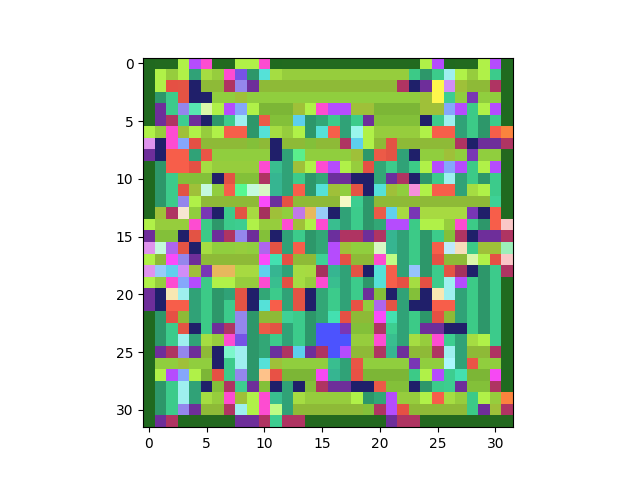

In [126]:
pixCol.drawPlot()

### Analysis


It seems the maxpool forces the representation into a higher level of abstraction. Concepts more like vertical and horizontal and corner, and less specific positions and boundaries.

## block2.res1.resadd

In [53]:
#############################
                       ######
ns.set("block2.res1.resadd")     ####
                       ######
#############################
#  torch.Size([1, 128, 16, 16]) <-- block2.res1.resadd       - block2.res1.resadd._1af_256dp_128dim_.bin

In [13]:
ns(
filename = "block2.res1.resadd._1af_256dp_128dim_.bin",
num_channels = 128,
pix_dim = 16,
)

ns(
activ_img = (np.fromfile(dirname+"/"+filename, dtype=np.float32)
            .reshape((pix_dim, pix_dim, num_channels))
            .transpose((2,0,1))
            )
)
activ_img.shape

(128, 16, 16)

### Clustering

#### Hierarchal Linking

In [14]:
ns(pixels = activ_img.reshape((num_channels,-1)))

In [15]:
ns(pix_link = hierarchy.linkage(
    pixels.transpose([1,0]),
    metric='euclidean',
    method='single',
    ))

In [16]:
#link_tree = hierarchy.to_tree(pix_link)

#### Dendrogram

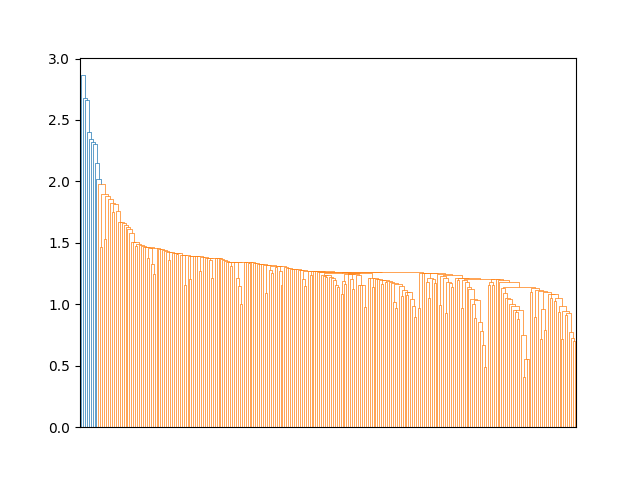

In [19]:
_fig_ax = plt.subplots()
ns(
fig = _fig_ax[0],
ax = _fig_ax[1],
)

acf = ax.add_collection
# dendrogram doesn't have linewidth setting
# but it can be bodged on by hacking the axes
def linmodacf(colec):
    colec.set(linewidth=0.5,)
    acf(colec)
ax.add_collection = linmodacf

ddg=hierarchy.dendrogram(pix_link,
           count_sort='ascending',
           no_labels=True,
           ax=ax,
           )

In [23]:
ax.set_xlim([-100,3000])
ax.set_ylim([-0.1,3])

(-0.1, 3.0)

#### Classify by Hierarchy

In [30]:
ns(classif = hierarchy.fcluster(
    pix_link,
    1.3,
    criterion='distance',
    depth=2,
    ))

classif.min(), classif.max()

(1, 94)

#### Classify by K-Means

In [73]:
num_classes = 15
_kmean_ = vq.kmeans2(pixels.T, num_classes, minit='points')
ns(km_centroids = _kmean_[0],
   km_label = _kmean_[1] +1 ## plus 1 back from zero indexing
  )
km_label.min(), km_label.max()

(1, 15)

### Interactive Pixel Cluster Labeling

In [69]:
# Create a new Interactive Pixel Colorer giving it the pixel classes shaped back into an image (64x64 in this case)
#ns(pixCol = InteractivePixCol(  classif.reshape((pix_dim,pix_dim))  ))
ns(pixCol = InteractivePixCol(  km_label.reshape((pix_dim,pix_dim))  ))

In [35]:
#pixCol.printClassif()

In [36]:
# manually clustered in NDSP
pixCol.loadClassif(
[[[127, 127, 127], [76, 241, 254], [238, 119, 134], [154, 128, 236], [239, 131, 195], [252, 254, 76], [204, 234, 112], [233, 181, 247], [215, 140, 244], [118, 169, 232], [199, 235, 246], [231, 79, 134], [174, 243, 246], [76, 185, 229], [234, 152, 97], [240, 106, 85], [234, 89, 100], [252, 200, 149], [236, 135, 147], [84, 231, 155], [233, 252, 204], [170, 244, 182], [98, 156, 235]], ["unclassed", "mouse?", "class3", "class4", "class5", "cheese?", "class7", "class8", "class9", "class10", "class11", "class12", "class13", "class14", "class15", "class16", "class17", "class18", "class19", "class20", "class21", "class22", "class23"], [20, 19, 0, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 3, 19, 3, 13, 14, 14, 17, 20, 15, 15, 15, 15, 15, 17, 17, 9, 9, 20, 3, 12, 9, 9, 9, 2, 9, 9, 9, 17, 9, 9, 9, 18, 16, 9, 8, 16, 16, 2, 2, 2, 2, 2, 2, 11, 8, 2, 2, 10, 11, 4, 8, 22, 22, 2, 6, 11, 4, 6, 6, 11, 8, 2, 6, 14, 11, 5, 8, 13, 22, 6, 6, 4, 14, 6, 6, 11, 21, 6, 19, 20, 18, 2, 8, 12, 9, 17, 6, 5, 5, 9, 15, 5, 5, 15, 15, 15, 15, 0, 19, 18, 16, 11, 9, 9, 9, 9, 9, 5, 5, 9, 9, 9, 17, 14, 10, 17, 20, 20, 16, 5, 8, 2, 18, 8, 9, 9, 2, 2, 2, 8, 10, 16, 16, 21, 21, 9, 8, 6, 1, 3, 2, 2, 2, 2, 14, 8, 2, 18, 16, 11, 8, 8, 2, 1, 1, 1, 2, 4, 6, 6, 16, 8, 2, 14, 22, 16, 8, 8, 6, 1, 1, 1, 15, 5, 6, 4, 0, 14, 4, 13, 22, 0, 16, 8, 7, 1, 1, 1, 1, 1, 5, 5, 6, 6, 3, 12, 18, 6, 14, 3, 6, 1, 1, 1, 1, 1, 5, 9, 5, 5, 3, 12, 8, 14, 14, 3, 10, 6, 1, 1, 6, 14, 8, 8, 11, 5, 8, 8, 8, 9, 9, 8, 8, 10, 18, 21, 10, 9, 8, 18, 11, 8, 8]]
)

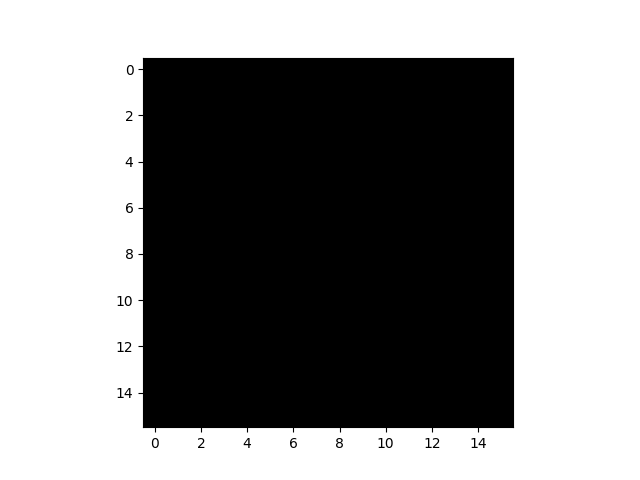

In [70]:
pixCol.drawPlot()

### Analysis

In [37]:
mouse_centroid = [-0.31014563888311386,-0.1531274518684337,-0.11489889770746231,-0.07894329589448477,0.031291946915811615,-0.2755104245519952,-0.18298116522400001,-0.028675998708135204,-0.04907404494128729,-0.28439292860658544,0.0012291647297771352,-0.2065830858130204,-0.17589387415271057,-0.23643320463107606,-0.10285883524308079,-0.18245022077309458,-0.22973402766020676,-0.09080119205540732,0.02030296309998161,0.11897329152806808,-0.25238627411032977,0.10503820271084183,0.21480933851317355,0.09334239005846412,-0.07639336193862714,-0.09553077052298345,-0.17645039801534854,-0.02780012727568024,-0.2541286819859555,-0.03972111524719941,-0.19295091927051544,0.020884830308587926,-0.13678279254389436,-0.07132016931121286,-0.22240488388036428,-0.20604882418717207,0.1863092587966668,0.008810206267394517,-0.045282749410130475,-0.07493985248239417,-0.09565088643055213,-0.12468134219709195,-0.10603061514465432,0.14881084820157603,0.07994953386093441,-0.15469434475036045,-0.086369851702138,-0.02379944489190453,-0.08756498051317115,0.04749347132287527,-0.08936017290934135,-0.2920767335515273,-0.10724743298794094,-0.15974735684300723,-0.05821050134928603,-0.09483874285299528,-0.1507387099493491,-0.15932442091013255,-0.04777231851690694,0.07492024529921382,-0.1590573224974306,-0.025580046208281266,-0.18818934624524494,-0.28414979616278097,-0.01927103200241139,-0.0738462538115288,-0.2023373693227768,-0.021641504411634645,-0.03180496708342904,-0.13927328508151204,-0.15139530952039518,-0.007625918247197804,-0.25374975133883326,-0.08907130595884825,-0.02799706141415395,-0.0006204372958133096,0.2489434737516077,-0.13785969113048754,-0.11701602184850919,-0.05710689056860773,0.03947523353915466,0.04535749691881632,-0.06881219129029073,-0.0871897643726123,-0.0705288503515093,-0.3109492396837787,-0.14017948312194725,-0.044512469321489334,-0.10073402818096311,-0.14531261062151507,-0.18341371338618428,-0.08537402925522704,-0.022938545401159086,-0.011406489500873968,0.11063175609237269,0.059488703153635324,0.028375351544175493,-0.11684843231188624,-0.20114783766238312,-0.036944119161681124,-0.12374518968557056,-0.03094036955582468,-0.25471663710318115,-0.13253478470601535,-0.05654913324274515,-0.039583018735835425,-0.004443072664894555,-0.2701941861918098,-0.06942731887102127,-0.11637229609646295,0.2081129631811851,-0.302742269870482,-0.061044423693889065,-0.21436038162363202,-0.12063645296975185,-0.15875331312417984,-0.12691265972037064,-0.23421664457572133,-0.11445120506380733,-0.21534390433838493,-0.14948275214747378,-0.001023177449640475,-0.008549305169205917,-0.19679562943546394,-0.11178124617589147,-0.12430104701534699,-0.18100948553336293,-0.24594868327441968]
cheese_centroid = [0.02631690353155136,-0.04870784655213356,-0.10406235108772914,-0.227570042014122,-0.11304711053768794,-0.19798071682453156,-0.017015638202428816,-0.13871045634150506,-0.031231041500965753,-0.28294243613878883,0.15174831822514534,0.09511195048689843,-0.24710245182116827,-0.10738831926137209,-0.07060745010773341,-0.19910459170738856,-0.11629543155431747,-0.08010486116011938,-0.1483772055556377,-0.060369396458069484,-0.09066190098722776,0.03896964428325494,0.08724240884184838,-0.17734248811999956,0.2166354639455676,-0.09581119393308958,0.25189919223388035,-0.12855719774961472,-0.09010714953765273,-0.01633304680387179,-0.18929025505979855,-0.014608995119730631,-0.12398570850491523,-0.02782120630145073,-0.13289280235767365,0.06050136225918929,-0.21505931243300438,-0.04513474591076374,-0.1252146303653717,-0.035871942962209385,-0.055664013729741176,-0.1828895832101504,-0.0980360912779967,-0.09062668047845364,0.037929767121871315,-0.2185462569197019,-0.11588230282068253,0.06731014351050059,-0.21432072278112174,-0.10912802889943123,-0.21760214492678642,-0.34446634352207184,-0.1566572950532039,0.0002171186109383901,0.01917759651939074,-0.09608164569362998,-0.1533442052702109,-0.17940946742892266,0.09051915854215623,0.023781332870324454,-0.16838673154513042,-0.11865933164954186,-0.19908736695845922,-0.10156090346475442,-0.07954707574099303,0.07813929580152035,-0.2045214128990968,-0.11286494558056195,-0.1807492621243,-0.05312682365377744,-0.28569790720939636,-0.14598806674281756,-0.21262979706128438,-0.10467949224015077,-0.1673436112701893,-0.05815467971066634,0.0792157436410586,-0.11992273107171059,-0.1940404012799263,-0.10862699473897616,-0.030969416610120485,-0.14878298913439114,0.012768705437580744,-0.055250607803463934,-0.12206829264760018,-0.20493909493088722,-0.18778198982278507,-0.025706854338447254,-0.07097890557100375,-0.2165290246407191,-0.14666136602560678,-0.1918700517465671,-0.11478707250207662,-0.23822432880600294,0.1708078246563673,-0.16831080615520477,-0.1740295872092247,-0.19269169867038727,-0.11850995259980361,-0.10143270591894786,-0.020375242557687065,-0.11156807541847229,-0.017153596691787242,-0.10817763196925322,-0.09546007042129835,-0.06481328687320152,-0.05606767808397611,-0.24608431234955788,-0.16858145346244177,-0.08122933208942414,-0.0592275054504474,-0.12472628181179364,-0.4033334255218506,0.08203412281970184,-0.061737732402980326,-0.12695553625623385,-0.10278175137937069,-0.062157173082232474,-0.15181288520495098,-0.049960171431303026,-0.1268110454082489,-0.11855554071565469,-0.18104061409831046,0.014722532127052546,-0.07181203166643778,-0.1667866217593352,-0.1668736641605695,-0.08918656619886557]


## LAYER_NAME

In [ ]:
##############################################
                                        ######
                                             #
ns.set("LAYER_NAME")
                                             #
                                        ######
##############################################


In [ ]:
ns(
filename = "FILENAME",
num_channels = NUM_CHANNEL,
pix_dim = PIX_DIMENSION,
)

ns(
activ_img = (np.fromfile(dirname+"/"+filename, dtype=np.float32)
            .reshape((pix_dim, pix_dim, num_channels))
            .transpose((2,0,1))
            )
)
activ_img.shape

### Clustering Pixels

In [ ]:
ns(pixels = activ_img.reshape((num_channels,-1)))
pixels.shape

#### Hierarchal Linking

In [ ]:
ns(pix_link = hierarchy.linkage(
    pixels.transpose([1,0]),
    metric='euclidean',
    method='single',
    ))

In [ ]:
#link_tree = hierarchy.to_tree(pix_link)

#### Dendrogram

In [ ]:
_fig_ax = plt.subplots()
ns(
dendro_fig = _fig_ax[0],
dendro_ax = _fig_ax[1],
)

acf = dendro_ax.add_collection
# dendrogram doesn't have linewidth setting
# but it can be bodged on by hacking the axes
def linmodacf(colec):
    colec.set(linewidth=0.5,)
    acf(colec)
dendro_ax.add_collection = linmodacf

ddg=hierarchy.dendrogram(pix_link,
           count_sort='ascending',
           no_labels=True,
           ax=dendro_ax,
           )

In [ ]:
dendro_ax.set_xlim([-1000,12000])
dendro_ax.set_ylim([-0.02,0.4])

#### Classify by Hierarchy

In [ ]:
ns(hi_classif = hierarchy.fcluster(
    pix_link,
    0.18,
    criterion='distance',
    depth=2,
    ))

hi_classif.min(), hi_classif.max()

#### Classify by K-Means

In [73]:
num_classes = 80
_kmean_ = vq.kmeans2(pixels.T, num_classes, minit='points')
ns(km_centroids = _kmean_[0],
   km_classif = _kmean_[1] +1 ## plus 1 back from zero indexing
  )
km_classif.min(), km_classif.max()

(1, 15)

### Interactive Pixel Cluster Labeling

In [ ]:
# Create a new Interactive Pixel Colorer giving it the pixel classes shaped back into an image (64x64 in this case)

#ns(pixCol = InteractivePixCol(  hi_classif.reshape((pix_dim,pix_dim))  ))
ns(pixCol = InteractivePixCol(  km_classif.reshape((pix_dim,pix_dim))  ))

In [135]:
# load classif
pixCol.loadClassif(
    # 
    
)

In [ ]:
#pixCol.printClassif()

In [ ]:
pixCol.drawPlot()

### Analysis